# Heart Disease Risk Assessment: A Machine Learning Approach

# P556
# Minju Kim, Ling Li, Lei Chen

# 1. EDA & Preprocessing

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

## (1) Load Data

In [ ]:
data = pd.read_csv('/content/cardio_data_processed.csv')
data

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category,bp_category_encoded
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,Hypertension Stage 1,Hypertension Stage 1
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,Hypertension Stage 2,Hypertension Stage 2
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,Hypertension Stage 1,Hypertension Stage 1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,Hypertension Stage 2,Hypertension Stage 2
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177,Normal,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68200,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,52,26.927438,Hypertension Stage 1,Hypertension Stage 1
68201,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,61,50.472681,Hypertension Stage 2,Hypertension Stage 2
68202,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,52,31.353579,Hypertension Stage 2,Hypertension Stage 2
68203,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,61,27.099251,Hypertension Stage 1,Hypertension Stage 1


## (2) Data Analysis
Columns description:
- id: Unique identifier for each patient.
- age: Age of the patient in days.
- gender: Gender of the patient (1 for female and 2 for male).
- height: Height of the patient in centimeters.
- weight: Weight of the patient in kilograms.
- ap_hi: Systolic blood pressure.
- ap_lo: Diastolic blood pressure.
- cholesterol: Cholesterol level (1: normal, 2: above normal, 3: well above normal).
- gluc: Glucose level (1: normal, 2: above normal, 3: well above normal).
- smoke: Whether the patient smokes (0 for no, 1 for yes).
- alco: Whether the patient consumes alcohol (0 for no, 1 for yes).
- active: Whether the patient is physically active (0 for no, 1 for yes).
- cardio: Presence of cardiovascular disease (0 for no, 1 for yes).
- age_years: Age of the patient in years.
- bmi: Body Mass Index of the patient.
- bp_category: Blood pressure category based on the patient's systolic and diastolic values.
- bp_category_encoded: Encoded representation of the blood pressure category.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68205 entries, 0 to 68204
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   68205 non-null  int64  
 1   age                  68205 non-null  int64  
 2   gender               68205 non-null  int64  
 3   height               68205 non-null  int64  
 4   weight               68205 non-null  float64
 5   ap_hi                68205 non-null  int64  
 6   ap_lo                68205 non-null  int64  
 7   cholesterol          68205 non-null  int64  
 8   gluc                 68205 non-null  int64  
 9   smoke                68205 non-null  int64  
 10  alco                 68205 non-null  int64  
 11  active               68205 non-null  int64  
 12  cardio               68205 non-null  int64  
 13  age_years            68205 non-null  int64  
 14  bmi                  68205 non-null  float64
 15  bp_category          68205 non-null 

In [ ]:
data.isnull().sum()

id                     0
age                    0
gender                 0
height                 0
weight                 0
ap_hi                  0
ap_lo                  0
cholesterol            0
gluc                   0
smoke                  0
alco                   0
active                 0
cardio                 0
age_years              0
bmi                    0
bp_category            0
bp_category_encoded    0
dtype: int64

There are no null values in this data set.

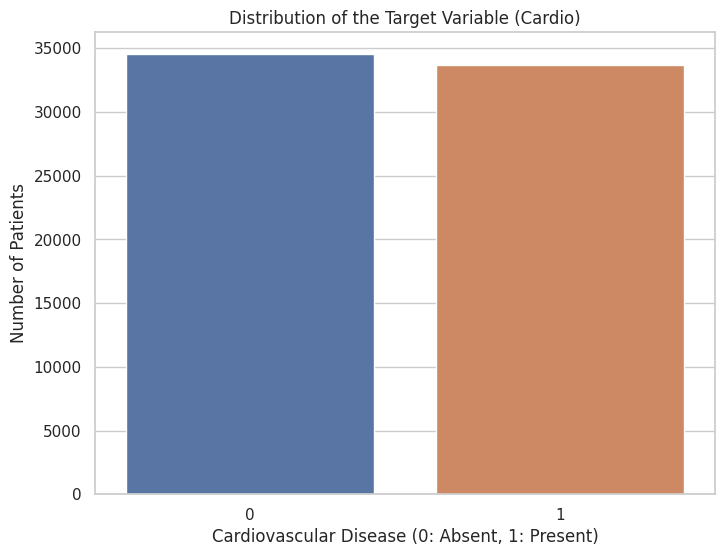

In [ ]:
# Set the style of the visualization
sns.set(style="whitegrid")

# Draw a bar plot of 'cardio' value counts
plt.figure(figsize=(8, 6))
sns.countplot(x='cardio', data=data)
plt.title('Distribution of the Target Variable (Cardio)')
plt.xlabel('Cardiovascular Disease (0: Absent, 1: Present)')
plt.ylabel('Number of Patients')
plt.show()

In [ ]:
sorted(data['bp_category'].unique())

['Elevated', 'Hypertension Stage 1', 'Hypertension Stage 2', 'Normal']

In [ ]:
sorted(data['bp_category_encoded'].unique())

['Elevated', 'Hypertension Stage 1', 'Hypertension Stage 2', 'Normal']

Two categorical columns have the same values and it turns out basically the same. So we can remove one of them.

In [ ]:
cardio_data = data.drop('bp_category', axis=1)

In [ ]:
cardio_data = cardio_data.drop('age', axis=1)

Also, the 'age' and 'age_years' basically show the same thing ('age' is the days someone has lived and 'age_years' is the years someone has lived, which is easier to analyze.) So I'll also drop the 'age' column.

In [ ]:
cardio_data.id.duplicated().sum()

0

There are no duplicate values in the "id" columns. We can now drop the "id" column because it doesn't affect the targe column("cardio")

In [ ]:
cardio_data = cardio_data.drop('id', axis=1)

In [ ]:
cardio_data.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category_encoded
0,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,Hypertension Stage 1
1,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,Hypertension Stage 2
2,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,Hypertension Stage 1
3,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,Hypertension Stage 2
4,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177,Normal


In [ ]:
cardio_data.describe()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi
count,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000
mean,1.348625,164.372861,74.100688,126.434924,81.263925,1.363243,1.225174,0.087662,0.053134,0.803548,0.493688,52.823635,27.510513
std,0.476539,8.176756,14.288862,15.961685,9.143985,0.678080,0.571288,0.282805,0.224302,0.397317,0.499964,6.769909,6.026497
min,1.000000,55.000000,11.000000,90.000000,60.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,29.000000,3.471784
25%,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000,23.875115
50%,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,53.000000,26.346494
75%,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000,30.116213
max,2.000000,250.000000,200.000000,180.000000,120.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,64.000000,298.666667


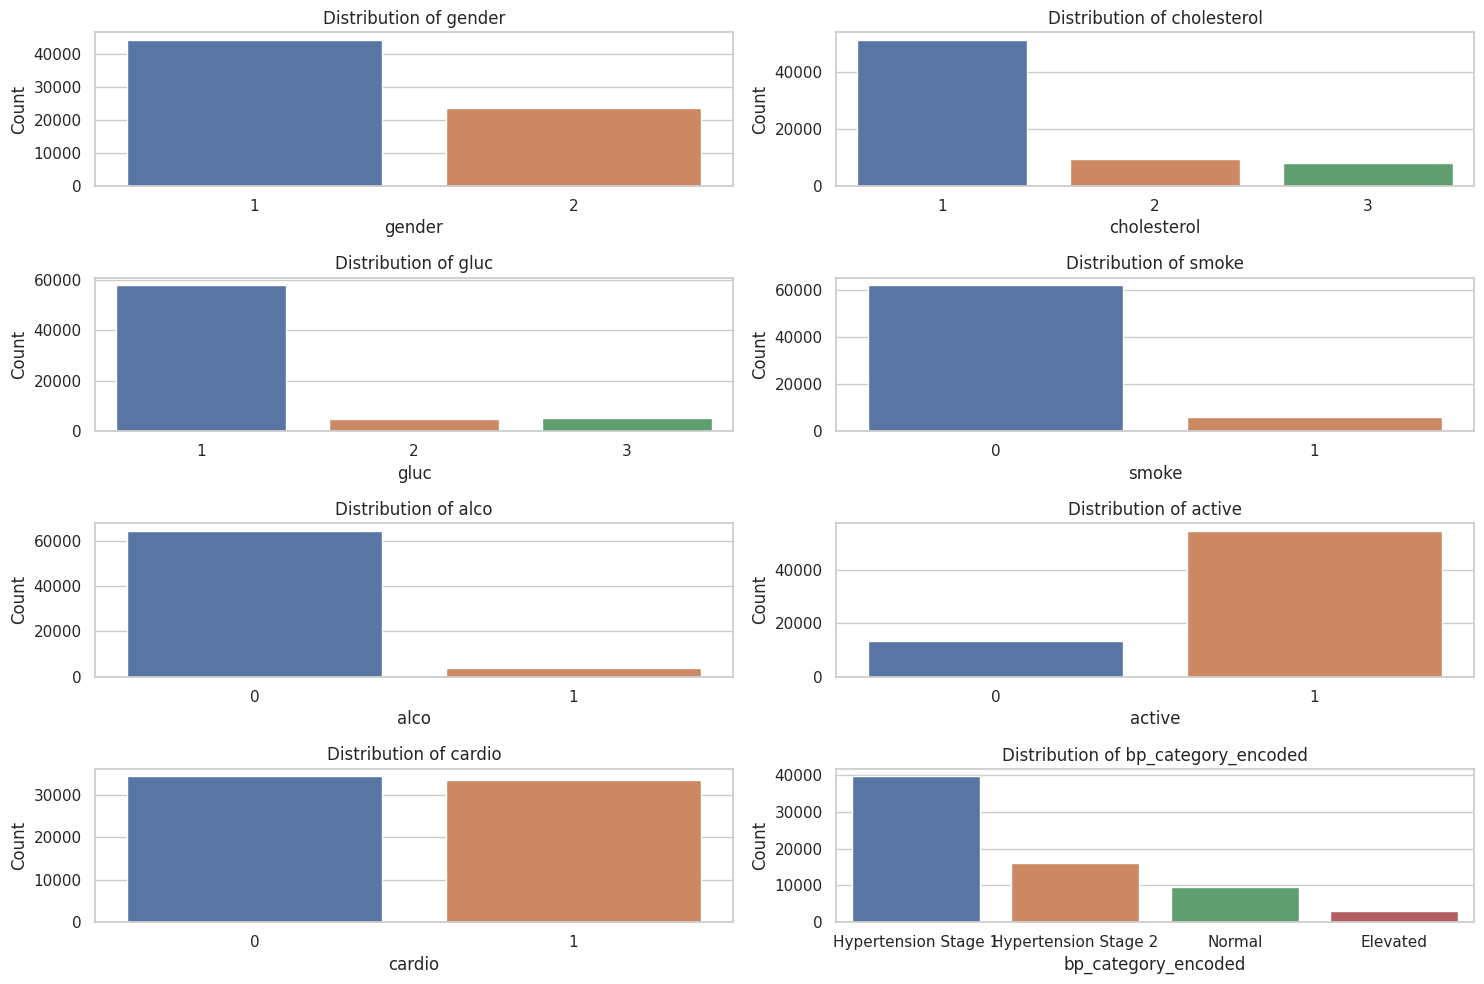

In [ ]:
columns_to_visualize = ["gender", "cholesterol", "gluc", "smoke", "alco", "active", "cardio", "bp_category_encoded"]

sns.set(style="whitegrid")

plt.figure(figsize=(15, 10))

for i, col in enumerate(columns_to_visualize, 1):
    plt.subplot(4, 2, i)
    sns.countplot(x=col, data=cardio_data)
    plt.title(f'Distribution of {col}')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

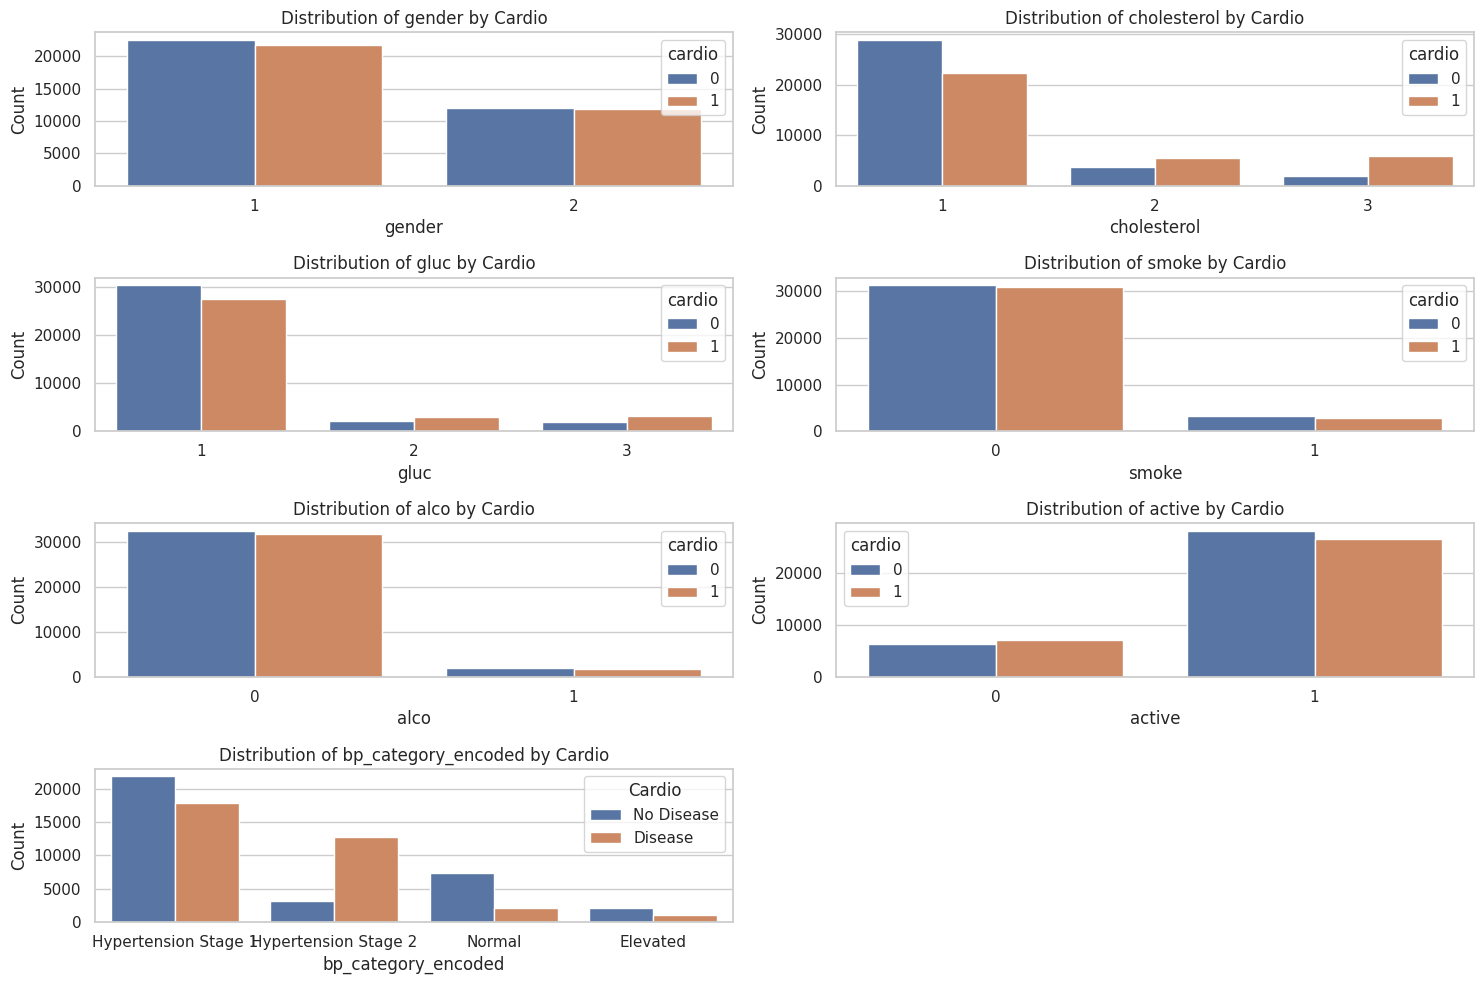

In [ ]:
# Columns to visualize by 'cardio' target column
columns_by_cardio = ["gender", "cholesterol", "gluc", "smoke", "alco", "active", "bp_category_encoded"]

plt.figure(figsize=(15, 10))
for i, col in enumerate(columns_by_cardio, 1):
    plt.subplot(4, 2, i)
    sns.countplot(x=cardio_data[col], hue=cardio_data['cardio'])
    plt.title(f"Distribution of {col} by Cardio")
    plt.ylabel('Count')
    plt.tight_layout()

plt.legend(title='Cardio', loc='upper right', labels=['No Disease', 'Disease'])
plt.show()

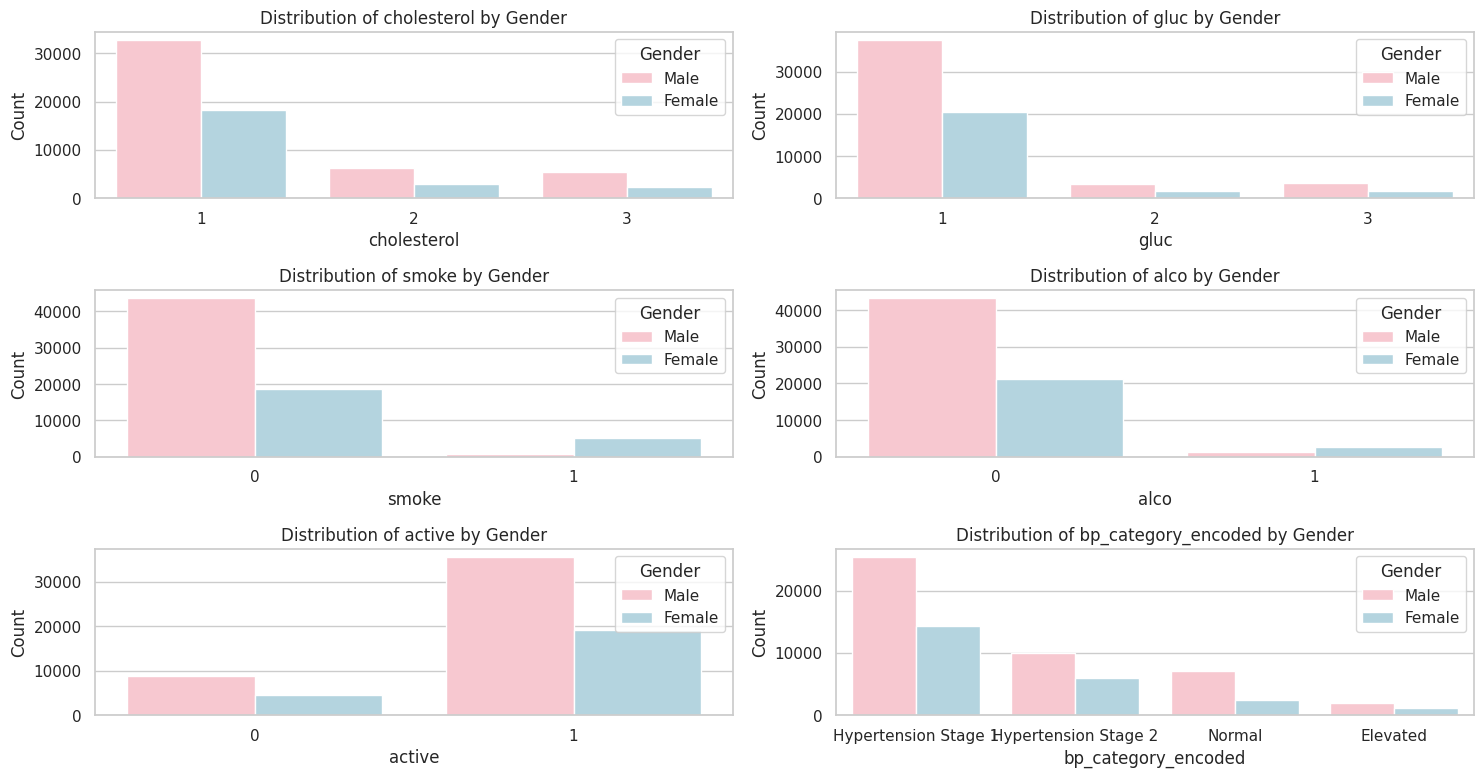

In [ ]:
gender_palette = {1: 'pink', 2: 'lightblue'}

columns_by_gender = ["cholesterol", "gluc", "smoke", "alco", "active", "bp_category_encoded"]

plt.figure(figsize=(15, 10))
for i, col in enumerate(columns_by_gender, 1):
    plt.subplot(4, 2, i)
    sns.countplot(x=cardio_data[col], hue=cardio_data['gender'], palette=gender_palette)
    plt.title(f"Distribution of {col} by Gender")
    plt.ylabel('Count')
    plt.tight_layout()
    plt.legend(title='Gender', loc='upper right', labels=['Male', 'Female'])


plt.show()

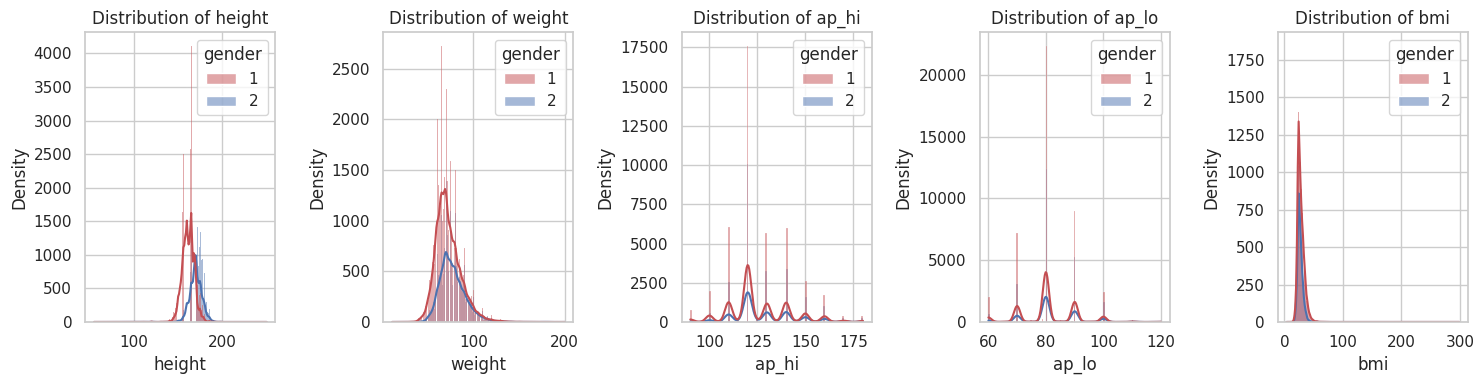

In [ ]:
custom_palette = {2: 'b', 1: 'r'}
continuous_features = ["height", "weight", "ap_hi", "ap_lo", "bmi"]

fig, axes = plt.subplots(1, 5, figsize=(15, 4))

for i, feature in enumerate(continuous_features):
    sns.histplot(data=cardio_data, x=feature, hue="gender", kde=True, ax=axes[i], palette=custom_palette)
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Density')

plt.tight_layout()

plt.show()

<ipython-input-16-8c5c198f2c48>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(cardio_data.corr(), annot=True, cmap='coolwarm', linewidths = 2)


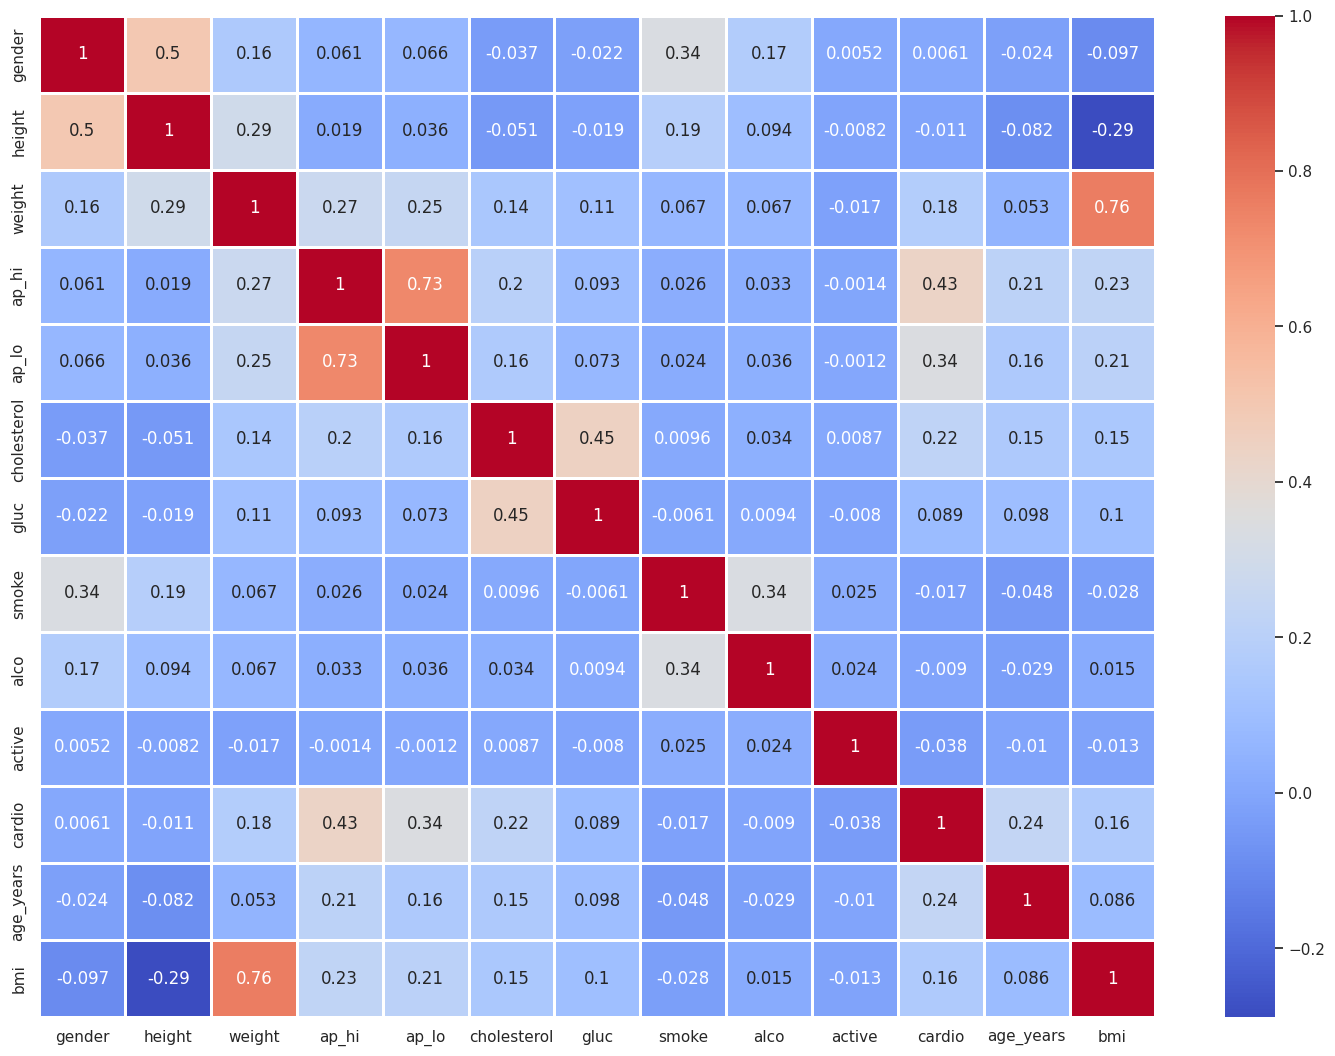

In [ ]:
plt.figure(figsize=(18,13))
sns.heatmap(cardio_data.corr(), annot=True, cmap='coolwarm', linewidths = 2)
plt.show()

## (3) Outliers

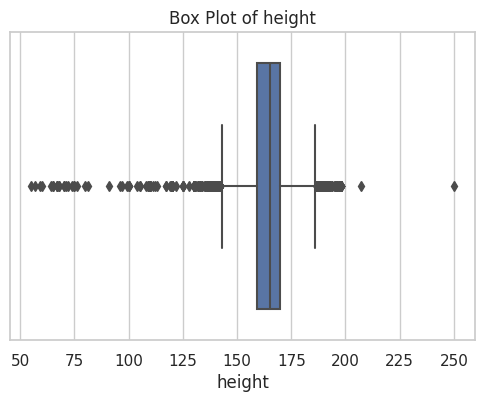

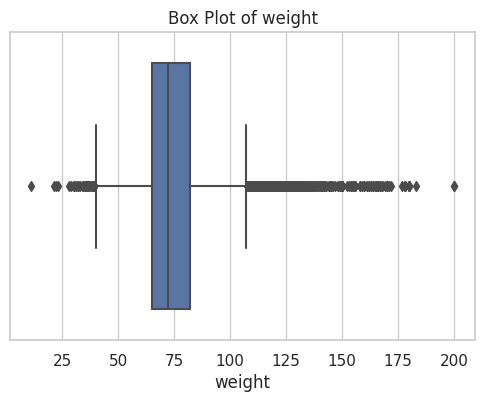

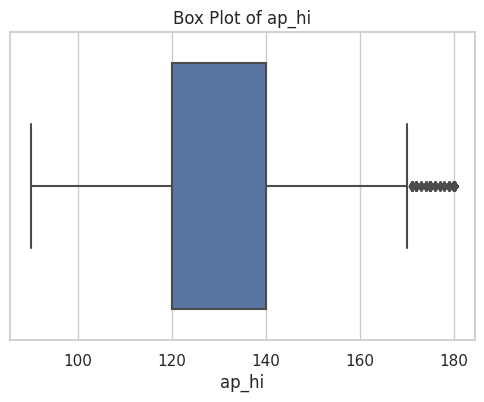

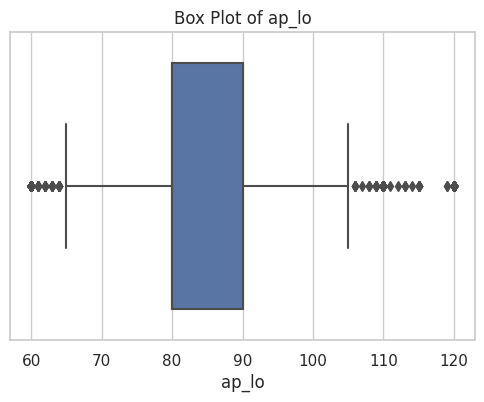

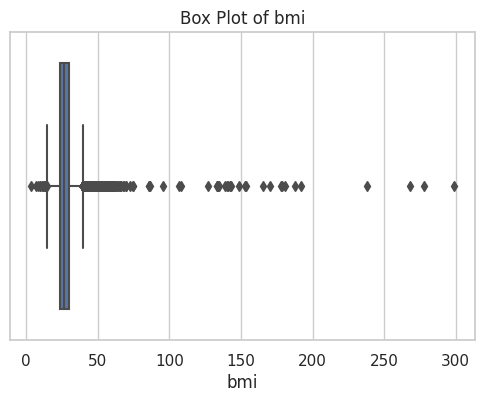

In [ ]:
continuous_features = ["height", "weight", "ap_hi", "ap_lo", "bmi"]

for feature in continuous_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=cardio_data[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()

In [ ]:
features = ["height", "weight", "bmi"]

for feature in features:
    Q1 = cardio_data[feature].quantile(0.25)
    Q3 = cardio_data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    cardio_data = cardio_data[(cardio_data[feature] >= lower_bound) & (cardio_data[feature] <= upper_bound)]

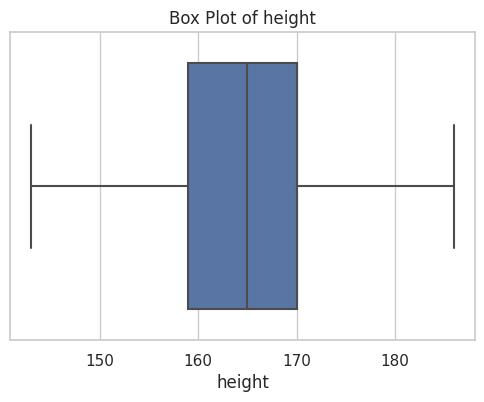

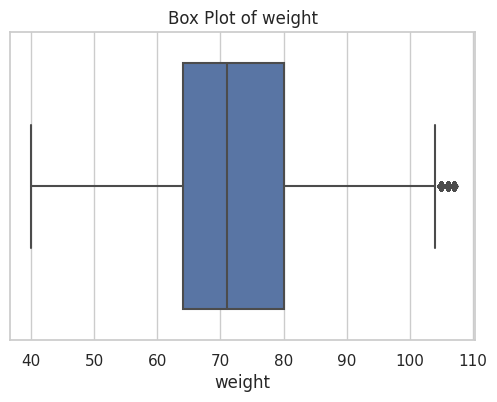

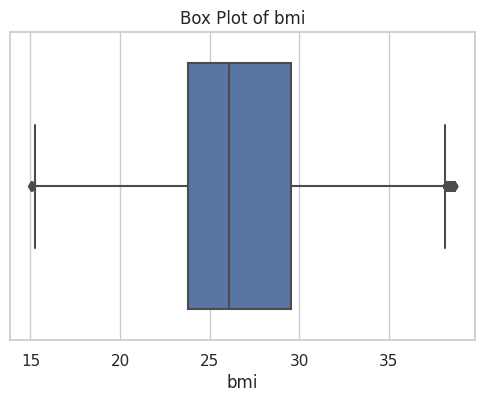

In [ ]:
continuous_features = ["height", "weight", "bmi"]

for feature in continuous_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=cardio_data[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()

## (4) Preprocessing

In [ ]:
# Define the mapping for ordinal encoding
bp_category_mapping = {
    'Normal': 1,
    'Elevated': 2,
    'Hypertension Stage 1': 3,
    'Hypertension Stage 2': 4
}

# Perform ordinal encoding on the "bp_category_encoded" column
cardio_data['bp_category_encoded'] = cardio_data['bp_category_encoded'].map(bp_category_mapping)

cardio_data.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category_encoded
0,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,3
1,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,4
2,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,3
3,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,4
4,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177,1


In [ ]:
scaler = StandardScaler()

# Apply scaling to the entire dataset excluding the binary columns (since they are already in the range [0, 1])
columns_to_scale = ['height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'age_years', 'bmi']

cardio_data[columns_to_scale] = scaler.fit_transform(cardio_data[columns_to_scale])

cardio_data.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category_encoded
0,2,0.443595,-0.846868,-1.029656,-0.138226,-0.535698,-0.394154,0,0,1,0,-0.417089,-0.919843,3
1,1,-1.023991,0.762789,0.849859,0.955397,2.413830,-0.394154,0,0,1,1,0.321479,1.230768,4
2,1,0.076698,-0.706898,0.223354,-1.231849,2.413830,-0.394154,0,0,0,1,-0.269376,-0.664190,3
3,2,0.565893,0.552834,1.476363,2.049021,-0.535698,-0.394154,0,0,1,1,-0.712516,0.199116,4
4,1,-1.023991,-1.266778,-1.656161,-2.325472,-0.535698,-0.394154,0,0,0,0,-0.860230,-0.746598,1


## Baseline Model

- Splitting the data set in to train, validation, and test set.
  - First, the dataset is split into a 60% training set and a 40% temporary set.
  - Then, the temporary set is equally divided into validation and test sets, each consisting of 20% of the original data.

In [ ]:
# Entire dataset
X_all = cardio_data.drop('cardio', axis=1)
y_all = cardio_data['cardio']
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_all, y_all, test_size=0.2, random_state=42)
X_train_all, X_val_all, y_train_all, y_val_all = train_test_split(X_train_all, y_train_all, test_size=0.2, random_state=42)

In [ ]:
X_train_all.shape, X_val_all.shape, X_test_all.shape, y_train_all.shape, y_val_all.shape, y_test_all.shape

((43651, 13), (10913, 13), (13641, 13), (43651,), (10913,), (13641,))

In [ ]:
# Women's data
women_data = cardio_data[cardio_data['gender'] == 1]
X_women = women_data.drop('cardio', axis=1)
X_women = X_women.drop('gender', axis=1)
y_women = women_data['cardio']
X_train_women, X_test_women, y_train_women, y_test_women = train_test_split(X_women, y_women, test_size=0.2, random_state=42)
X_train_women, X_val_women, y_train_women, y_val_women = train_test_split(X_train_women, y_train_women, test_size=0.2, random_state=42)

In [ ]:
X_train_women.shape, X_val_women.shape, X_test_women.shape, y_train_women.shape, y_val_women.shape, y_test_women.shape

((28432, 12), (7109, 12), (8886, 12), (28432,), (7109,), (8886,))

In [ ]:
# Men's data
men_data = cardio_data[cardio_data['gender'] == 2]
X_men = men_data.drop('cardio', axis=1)
X_men = X_men.drop('gender', axis=1)
y_men = men_data['cardio']
# Split men's data into train, validation, and test sets
X_train_men, X_test_men, y_train_men, y_test_men = train_test_split(X_men, y_men, test_size=0.2, random_state=42)
X_train_men, X_val_men, y_train_men, y_val_men = train_test_split(X_train_men, y_train_men, test_size=0.2, random_state=42)

In [ ]:
X_train_men.shape, X_val_men.shape, X_test_men.shape, y_train_men.shape, y_val_men.shape, y_test_men.shape

((15217, 12), (3805, 12), (4756, 12), (15217,), (3805,), (4756,))

In [ ]:
# Initialize the Logistic Regression model
lr_all = LogisticRegression(max_iter=1000)
lr_women = LogisticRegression(max_iter=1000)
lr_men = LogisticRegression(max_iter=1000)

# Training and evaluating for the entire dataset
lr_all.fit(X_train_all, y_train_all)
y_pred_val_all = lr_all.predict(X_val_all)

# Training and evaluating for women's data
lr_women.fit(X_train_women, y_train_women)
y_pred_val_women = lr_women.predict(X_val_women)

# Training and evaluating for men's data
lr_men.fit(X_train_men, y_train_men)
y_pred_val_men = lr_men.predict(X_val_men)

In [ ]:
with open('lr_model_all.pkl', 'wb') as file:
    pickle.dump(lr_all, file)

with open('lr_model_women.pkl', 'wb') as file:
    pickle.dump(lr_women, file)

with open('lr_model_men.pkl', 'wb') as file:
    pickle.dump(lr_men, file)

print("Model saved successfully!")

Model saved successfully!


In [ ]:
# Define a function to compute and display the metrics
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred)
    confusion = confusion_matrix(y_true, y_pred)

    print(f"------ {model_name} ------")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")
    print("Confusion Matrix:")
    print(confusion)
    print("\n")

# Evaluating the models
evaluate_model(y_val_all, y_pred_val_all, "Entire Data")
if not X_train_women.empty:
    evaluate_model(y_val_women, y_pred_val_women, "Women's Data")
if not X_train_men.empty:
    evaluate_model(y_val_men, y_pred_val_men, "Men's Data")

------ Entire Data ------
Accuracy: 0.7187
Precision: 0.7385
Recall: 0.6446
F1-Score: 0.6884
ROC-AUC: 0.7161
Confusion Matrix:
[[4232 1141]
 [1777 3223]]


------ Women's Data ------
Accuracy: 0.7328
Precision: 0.7470
Recall: 0.6686
F1-Score: 0.7056
ROC-AUC: 0.7302
Confusion Matrix:
[[2777  730]
 [1068 2155]]


------ Men's Data ------
Accuracy: 0.7335
Precision: 0.7653
Recall: 0.6685
F1-Score: 0.7137
ROC-AUC: 0.7331
Confusion Matrix:
[[1462  371]
 [ 600 1210]]




# PCA

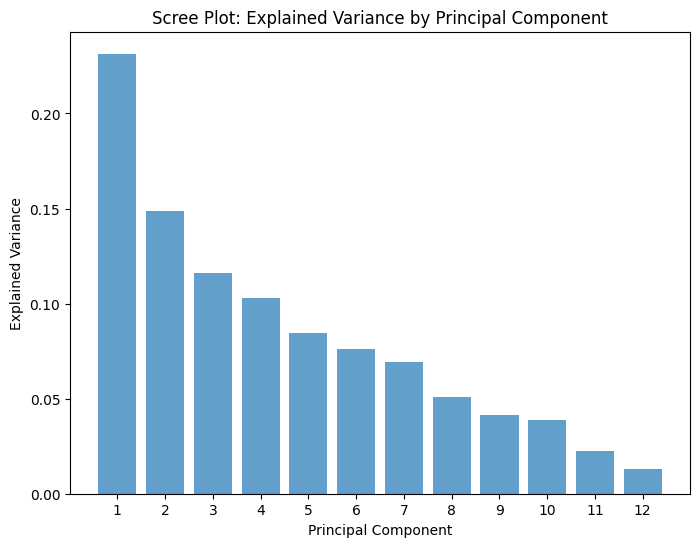

In [ ]:
# Select the features for PCA
features = ['gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'age_years', 'bmi', 'bp_category_encoded']

# Standardize the selected features
scaler = StandardScaler()
cardio_data[features] = scaler.fit_transform(cardio_data[features])

# Create a PCA instance
pca = PCA(n_components=12)  # Retain 5 principal components

# Fit PCA to your data
pca.fit(cardio_data[features])

# Get the principal components
principal_components = pca.transform(cardio_data[features])

# Get the explained variances of the principal components
explained_variances = pca.explained_variance_ratio_

# Get the explained variances
explained_variances = pca.explained_variance_ratio_

# Create a scree plot
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variances) + 1), explained_variances, alpha=0.7, align='center')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.title('Scree Plot: Explained Variance by Principal Component')
plt.xticks(range(1, len(explained_variances) + 1))
plt.show()

## (1) PCA on Entire Data

In [ ]:
# Select the features for PCA
features = ['height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'age_years', 'bmi', 'bp_category_encoded']


# Create a PCA instance
pca = PCA(n_components=7)  # Retain the first 7 principal components

# Fit PCA to your data
pca.fit(cardio_data[features])

# Get the first 7 principal components
first_7_principal_components_all = pca.transform(cardio_data[features])[:, :7]

# Split the data into features (X) and the target variable (y)
X_all = pd.DataFrame(first_7_principal_components_all)  # Features (the first 7 principal components)
y_all = cardio_data['cardio']  # Target variable

# Split the data into a training set and a testing set
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_all, y_all, test_size=0.2, random_state=42)

# Create a logistic regression model
logistic_model = LogisticRegression()

# Train the model on the training data
logistic_model.fit(X_train_all, y_train_all)

# Make predictions on the test data
y_pred_all = logistic_model.predict(X_test_all)

# Calculate the accuracy of the model
accuracy_all = accuracy_score(y_test_all, y_pred_all)
print(f"Accuracy: {accuracy_all:.2f}")

# Generate a classification report
report_all = classification_report(y_test_all, y_pred_all)
print(report_all)

Accuracy: 0.71
              precision    recall  f1-score   support

           0       0.71      0.74      0.73      6962
           1       0.72      0.69      0.70      6679

    accuracy                           0.71     13641
   macro avg       0.71      0.71      0.71     13641
weighted avg       0.71      0.71      0.71     13641



## (2) PCA on Women Data

In [ ]:
# Select the features for PCA
features = ['gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'age_years', 'bmi', 'bp_category_encoded']


# Create a PCA instance
pca = PCA(n_components=7)  # Retain the first 7 principal components

# Fit PCA to your data
pca.fit(women_data[features])

# Get the first 7 principal components
first_7_principal_components_women = pca.transform(women_data[features])[:, :7]

# Split the data into features (X) and the target variable (y)
X_women = pd.DataFrame(first_7_principal_components_women)  # Features (the first 7 principal components)
y_women = women_data['cardio']  # Target variable

# Split the data into a training set and a testing set
X_train_women, X_test_women, y_train_women, y_test_women = train_test_split(X_women, y_women, test_size=0.2, random_state=42)

# Create a logistic regression model
logistic_model = LogisticRegression()

# Train the model on the training data
logistic_model.fit(X_train_women, y_train_women)

# Make predictions on the test data
y_pred_women = logistic_model.predict(X_test_women)

# Calculate the accuracy of the model
accuracy_women = accuracy_score(y_test_women, y_pred_women)
print(f"Accuracy: {accuracy_women:.2f}")

# Generate a classification report
report_women = classification_report(y_test_women, y_pred_women)
print(report_women)

Accuracy: 0.74
              precision    recall  f1-score   support

           0       0.72      0.79      0.75      4509
           1       0.76      0.68      0.72      4377

    accuracy                           0.74      8886
   macro avg       0.74      0.74      0.74      8886
weighted avg       0.74      0.74      0.74      8886



## (3) PCA on Men Data

In [ ]:
# Select the features for PCA
features = ['gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'age_years', 'bmi', 'bp_category_encoded']


# Create a PCA instance
pca = PCA(n_components=7)  # Retain the first 7 principal components

# Fit PCA to your data
pca.fit(men_data[features])

# Get the first 7 principal components
first_7_principal_components_men = pca.transform(men_data[features])[:, :7]

# Split the data into features (X) and the target variable (y)
X_men = pd.DataFrame(first_7_principal_components_men)
y_men = men_data['cardio']  # Target variable

# Split the data into a training set and a testing set
X_train_men, X_test_men, y_train_men, y_test_men = train_test_split(X_men, y_men, test_size=0.2, random_state=42)

# Create a logistic regression model
logistic_model = LogisticRegression()

# Train the model on the training data
logistic_model.fit(X_train_men, y_train_men)

# Make predictions on the test data
y_pred_men = logistic_model.predict(X_test_men)

# Calculate the accuracy of the model
accuracy_men = accuracy_score(y_test_men, y_pred_men)
print(f"Accuracy: {accuracy_men:.2f}")

# Generate a classification report
report_men = classification_report(y_test_men, y_pred_men)
print(report_men)

Accuracy: 0.72
              precision    recall  f1-score   support

           0       0.69      0.79      0.74      2344
           1       0.76      0.65      0.70      2412

    accuracy                           0.72      4756
   macro avg       0.73      0.72      0.72      4756
weighted avg       0.73      0.72      0.72      4756



In [ ]:
# Define a function to compute and display the metrics
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred)
    confusion = confusion_matrix(y_true, y_pred)

    print(f"------ {model_name} ------")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")
    print("Confusion Matrix:")
    print(confusion)
    print("\n")

# Evaluating the models
evaluate_model(y_test_all, y_pred_all, "PCA on Entire Data")
if not X_train_women.empty:
    evaluate_model(y_test_women, y_pred_women, "PCA on Women's Data")
if not X_train_men.empty:
    evaluate_model(y_test_men, y_pred_men, "PCA on Men's Data")

------ PCA on Entire Data ------
Accuracy: 0.7142
Precision: 0.7168
Recall: 0.6884
F1-Score: 0.7023
ROC-AUC: 0.7137
Confusion Matrix:
[[5145 1817]
 [2081 4598]]


------ PCA on Women's Data ------
Accuracy: 0.7363
Precision: 0.7585
Recall: 0.6817
F1-Score: 0.7181
ROC-AUC: 0.7355
Confusion Matrix:
[[3559  950]
 [1393 2984]]


------ PCA on Men's Data ------
Accuracy: 0.7197
Precision: 0.7636
Recall: 0.6480
F1-Score: 0.7011
ROC-AUC: 0.7208
Confusion Matrix:
[[1860  484]
 [ 849 1563]]




Based on the results above, we chose not to apply the PCA.

# Applying Machin Learning Models
## 1. Support Vector Machine (SVM)

In [ ]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [ ]:
# Define the SVM and KNN models
svm_model = SVC()

# Training and evaluating SVM on different datasets
# Entire dataset
svm_model.fit(X_train_all, y_train_all)
svm_pred_all = svm_model.predict(X_val_all)

# Women's data
svm_model.fit(X_train_women, y_train_women)
svm_pred_Women = svm_model.predict(X_val_women)

# Men's data
svm_model.fit(X_train_men, y_train_men)
svm_pred_men = svm_model.predict(X_val_men)

# Evaluating the models
print("Support Vector Machine (SVM):")
evaluate_model(y_val_all, svm_pred_all, "Entire Data")
if not X_train_women.empty:
    evaluate_model(y_val_women, svm_pred_Women, "Women's Data")
if not X_train_men.empty:
    evaluate_model(y_val_men, svm_pred_men, "Men's Data")

Support Vector Machine (SVM):
------ Entire Data ------
Accuracy: 0.7194
Precision: 0.7408
Recall: 0.6426
F1-Score: 0.6882
ROC-AUC: 0.7167
Confusion Matrix:
[[4249 1124]
 [1787 3213]]


------ Women's Data ------
Accuracy: 0.7397
Precision: 0.7578
Recall: 0.6708
F1-Score: 0.7117
ROC-AUC: 0.7369
Confusion Matrix:
[[2816  691]
 [1061 2162]]


------ Men's Data ------
Accuracy: 0.7343
Precision: 0.7702
Recall: 0.6630
F1-Score: 0.7126
ROC-AUC: 0.7338
Confusion Matrix:
[[1475  358]
 [ 610 1200]]




## 2. K-Nearest Neighbors (K-NN)

In [ ]:
knn_model = KNeighborsClassifier()

# Training and evaluating KNN on different datasets
# Entire dataset
knn_model.fit(X_train_all, y_train_all)
knn_pred_all = knn_model.predict(X_val_all)

# Women's data
knn_model.fit(X_train_women, y_train_women)
knn_pred_Women = knn_model.predict(X_val_women)

# Men's data
knn_model.fit(X_train_men, y_train_men)
knn_pred_men = knn_model.predict(X_val_men)

# Evaluating the models
print("K-Nearest Neighbors (K-NN):")
evaluate_model(y_val_all, knn_pred_all, "Entire Data")
if not X_train_women.empty:
    evaluate_model(y_val_women, knn_pred_Women, "Women's Data")
if not X_train_men.empty:
    evaluate_model(y_val_men, knn_pred_men, "Men's Data")

K-Nearest Neighbors (K-NN):
------ Entire Data ------
Accuracy: 0.6886
Precision: 0.6792
Recall: 0.6708
F1-Score: 0.6750
ROC-AUC: 0.6880
Confusion Matrix:
[[3789 1584]
 [1646 3354]]


------ Women's Data ------
Accuracy: 0.7031
Precision: 0.6923
Recall: 0.6841
F1-Score: 0.6882
ROC-AUC: 0.7024
Confusion Matrix:
[[2527  980]
 [1018 2205]]


------ Men's Data ------
Accuracy: 0.6934
Precision: 0.6963
Recall: 0.6790
F1-Score: 0.6876
ROC-AUC: 0.6933
Confusion Matrix:
[[1297  536]
 [ 581 1229]]




# 3. XGBoost

In [ ]:
import xgboost as xgb

In [ ]:
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Entire dataset
xgb_model.fit(X_train_all, y_train_all)
xgb_pred_all = xgb_model.predict(X_val_all)

# Women's data
xgb_model.fit(X_train_women, y_train_women)
xgb_pred_Women = xgb_model.predict(X_val_women)

# Men's data
xgb_model.fit(X_train_men, y_train_men)
xgb_pred_men = xgb_model.predict(X_val_men)

# Evaluating the models
print("XGBoost Model:")
evaluate_model(y_val_all, xgb_pred_all, "Entire Data")
if not X_train_women.empty:
    evaluate_model(y_val_women, xgb_pred_Women, "Women's Data")
if not X_train_men.empty:
    evaluate_model(y_val_men, xgb_pred_men, "Men's Data")

XGBoost Model:
------ Entire Data ------
Accuracy: 0.7196
Precision: 0.7265
Recall: 0.6706
F1-Score: 0.6975
ROC-AUC: 0.7179
Confusion Matrix:
[[4111 1262]
 [1647 3353]]


------ Women's Data ------
Accuracy: 0.7328
Precision: 0.7368
Recall: 0.6879
F1-Score: 0.7115
ROC-AUC: 0.7310
Confusion Matrix:
[[2715  792]
 [1006 2217]]


------ Men's Data ------
Accuracy: 0.7203
Precision: 0.7390
Recall: 0.6757
F1-Score: 0.7059
ROC-AUC: 0.7200
Confusion Matrix:
[[1401  432]
 [ 587 1223]]




## 4. Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize the Decision Tree model
dt = DecisionTreeClassifier(random_state=42)

# Train the model on the entire dataset
dt.fit(X_train_all, y_train_all)
dt_pred_all = dt.predict(X_val_all)

# Train the model on the women's dataset
dt.fit(X_train_women, y_train_women)
dt_pred_women = dt.predict(X_val_women)

# Train the model on the men's dataset
dt.fit(X_train_men, y_train_men)
dt_pred_men = dt.predict(X_val_men)

# Evaluating the models
print("Decision Tree:")
evaluate_model(y_val_all, dt_pred_all, "Entire Data")
if not X_train_women.empty:
    evaluate_model(y_val_women, dt_pred_women, "Women's Data")
if not X_train_men.empty:
    evaluate_model(y_val_men, dt_pred_men, "Men's Data")

Decision Tree:
------ Entire Data ------
Accuracy: 0.6290
Precision: 0.6157
Recall: 0.6132
F1-Score: 0.6144
ROC-AUC: 0.6285
Confusion Matrix:
[[3459 1914]
 [1934 3066]]


------ Women's Data ------
Accuracy: 0.6429
Precision: 0.6276
Recall: 0.6258
F1-Score: 0.6267
ROC-AUC: 0.6422
Confusion Matrix:
[[2310 1197]
 [1206 2017]]


------ Men's Data ------
Accuracy: 0.6237
Precision: 0.6224
Recall: 0.6166
F1-Score: 0.6195
ROC-AUC: 0.6236
Confusion Matrix:
[[1156  677]
 [ 694 1116]]




## 5. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Train the model on the entire dataset
rf.fit(X_train_all, y_train_all)
rf_pred_all = rf.predict(X_val_all)

# Train the model on the women's dataset
rf.fit(X_train_women, y_train_women)
rf_pred_women = rf.predict(X_val_women)

# Train the model on the men's dataset
rf.fit(X_train_men, y_train_men)
rf_pred_men = rf.predict(X_val_men)

# Evaluating the models
print("Random Forest:")
evaluate_model(y_val_all, rf_pred_all, "Entire Data")
if not X_train_women.empty:
    evaluate_model(y_val_women, rf_pred_women, "Women's Data")
if not X_train_men.empty:
    evaluate_model(y_val_men, rf_pred_men, "Men's Data")

Random Forest:
------ Entire Data ------
Accuracy: 0.6989
Precision: 0.6877
Recall: 0.6878
F1-Score: 0.6877
ROC-AUC: 0.6985
Confusion Matrix:
[[3811 1562]
 [1561 3439]]


------ Women's Data ------
Accuracy: 0.7147
Precision: 0.7053
Recall: 0.6944
F1-Score: 0.6998
ROC-AUC: 0.7139
Confusion Matrix:
[[2572  935]
 [ 985 2238]]


------ Men's Data ------
Accuracy: 0.7044
Precision: 0.7098
Recall: 0.6851
F1-Score: 0.6972
ROC-AUC: 0.7042
Confusion Matrix:
[[1326  507]
 [ 570 1240]]




## 6. Naive Bayesian

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Initialize the Naive Bayes model
nb = GaussianNB()

# Train the model on the entire dataset
nb.fit(X_train_all, y_train_all)
nb_pred_all = nb.predict(X_val_all)

# Train the model on the women's dataset
nb.fit(X_train_women, y_train_women)
nb_pred_women = nb.predict(X_val_women)

# Train the model on the men's dataset
nb.fit(X_train_men, y_train_men)
nb_pred_men = nb.predict(X_val_men)

# Evaluating the models
print("Naive Bayes:")
evaluate_model(y_val_all, nb_pred_all, "Entire Data")
if not X_train_women.empty:
    evaluate_model(y_val_women, nb_pred_women, "Women's Data")
if not X_train_men.empty:
    evaluate_model(y_val_men, nb_pred_men, "Men's Data")

Naive Bayes:
------ Entire Data ------
Accuracy: 0.7101
Precision: 0.7297
Recall: 0.6332
F1-Score: 0.6780
ROC-AUC: 0.7074
Confusion Matrix:
[[4200 1173]
 [1834 3166]]


------ Women's Data ------
Accuracy: 0.7202
Precision: 0.7334
Recall: 0.6531
F1-Score: 0.6910
ROC-AUC: 0.7175
Confusion Matrix:
[[2742  765]
 [1118 2105]]


------ Men's Data ------
Accuracy: 0.7131
Precision: 0.7511
Recall: 0.6320
F1-Score: 0.6865
ROC-AUC: 0.7126
Confusion Matrix:
[[1454  379]
 [ 666 1144]]




## 7. Perceptron Neuron

In [ ]:
from sklearn.linear_model import Perceptron

# Initialize the Perceptron model
perceptron = Perceptron(random_state=42)

# Train the model on the entire dataset
perceptron.fit(X_train_all, y_train_all)
perceptron_pred_all = perceptron.predict(X_val_all)

# Train the model on the women's dataset
perceptron.fit(X_train_women, y_train_women)
perceptron_pred_women = perceptron.predict(X_val_women)

# Train the model on the men's dataset
perceptron.fit(X_train_men, y_train_men)
perceptron_pred_men = perceptron.predict(X_val_men)

# Evaluating the models
print("Perceptron:")
evaluate_model(y_val_all, perceptron_pred_all, "Entire Data")
if not X_train_women.empty:
    evaluate_model(y_val_women, perceptron_pred_women, "Women's Data")
if not X_train_men.empty:
    evaluate_model(y_val_men, perceptron_pred_men, "Men's Data")

Perceptron:
------ Entire Data ------
Accuracy: 0.6950
Precision: 0.6866
Recall: 0.6756
F1-Score: 0.6810
ROC-AUC: 0.6943
Confusion Matrix:
[[3831 1542]
 [1622 3378]]


------ Women's Data ------
Accuracy: 0.5808
Precision: 0.5354
Recall: 0.9442
F1-Score: 0.6833
ROC-AUC: 0.5955
Confusion Matrix:
[[ 866 2641]
 [ 180 3043]]


------ Men's Data ------
Accuracy: 0.6830
Precision: 0.6540
Recall: 0.7685
F1-Score: 0.7066
ROC-AUC: 0.6835
Confusion Matrix:
[[1097  736]
 [ 419 1391]]




## 8. Multi-Layer Perceptron (MLP)

In [ ]:
from sklearn.neural_network import MLPClassifier

# Initialize the MLP model
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=1)

# Train the model on the entire dataset
mlp.fit(X_train_all, y_train_all)
mlp_pred_all = mlp.predict(X_val_all)

# Train the model on the women's dataset
mlp.fit(X_train_women, y_train_women)
mlp_pred_women = mlp.predict(X_val_women)

# Train the model on the men's dataset
mlp.fit(X_train_men, y_train_men)
mlp_pred_men = mlp.predict(X_val_men)

# Evaluating the models
print("Multi-Layer Perceptron (MLP):")
evaluate_model(y_val_all, mlp_pred_all, "Entire Data")
if not X_train_women.empty:
    evaluate_model(y_val_women, mlp_pred_women, "Women's Data")
if not X_train_men.empty:
    evaluate_model(y_val_men, mlp_pred_men, "Men's Data")

Multi-Layer Perceptron (MLP):
------ Entire Data ------
Accuracy: 0.6951
Precision: 0.6916
Recall: 0.6630
F1-Score: 0.6770
ROC-AUC: 0.6940
Confusion Matrix:
[[3895 1478]
 [1685 3315]]


------ Women's Data ------
Accuracy: 0.7083
Precision: 0.7106
Recall: 0.6596
F1-Score: 0.6842
ROC-AUC: 0.7063
Confusion Matrix:
[[2641  866]
 [1097 2126]]


------ Men's Data ------
Accuracy: 0.6783
Precision: 0.6700
Recall: 0.6945
F1-Score: 0.6820
ROC-AUC: 0.6784
Confusion Matrix:
[[1214  619]
 [ 553 1257]]




#Hyperparameter Tuning to Both models

---



## 1. SVM with Hyperparameter Tuning

In [ ]:
# Hyperparameter grids
svm_param_grid = {
    'C': [1, 10],
    'gamma': ['scale'],
    'kernel': ['rbf']
}

# Grid search setup
svm_grid_search_all = GridSearchCV(SVC(), svm_param_grid, cv=5, n_jobs=-1)
svm_grid_search_women = GridSearchCV(SVC(), svm_param_grid, cv=5, n_jobs=-1)
svm_grid_search_men = GridSearchCV(SVC(), svm_param_grid, cv=5, n_jobs=-1)

In [ ]:
svm_grid_search_all.fit(X_train_all, y_train_all)
best_params_svm_all = SVC(**svm_grid_search_all.best_params_)
best_svm_model_all = svm_grid_search_all.best_estimator_

In [ ]:
import pickle

svm_model_all = best_svm_model_all

with open('svm_model_all.pkl', 'wb') as file:
    pickle.dump(svm_model_all, file)

print("Model saved successfully!")

Model saved successfully!


In [ ]:
svm_grid_search_women.fit(X_train_women, y_train_women)
best_params_svm_women = SVC(**svm_grid_search_women.best_params_)
best_svm_model_women = svm_grid_search_women.best_estimator_

In [ ]:
svm_model_women = best_svm_model_women

with open('svm_model_women.pkl', 'wb') as file:
    pickle.dump(svm_model_women, file)

print("Model saved successfully!")

Model saved successfully!


In [ ]:
svm_grid_search_men.fit(X_train_men, y_train_men)
best_params_svm_men = SVC(**svm_grid_search_men.best_params_)
best_svm_model_men = svm_grid_search_men.best_estimator_

In [ ]:
svm_model_men = best_svm_model_men

with open('svm_model_men.pkl', 'wb') as file:
    pickle.dump(svm_model_men, file)

print("Model saved successfully!")

Model saved successfully!


In [ ]:
# Entire Data
y_pred_svm_tuned_all = best_svm_model_all.predict(X_val_all)

# Women's Data
y_pred_svm_tuned_women = best_svm_model_women.predict(X_val_women)

# Men's Data
y_pred_svm_tuned_men = best_svm_model_men.predict(X_val_men)

# Evaluating the models
print("SVM Model:")
evaluate_model(y_val_all, y_pred_svm_tuned_all, "Entire Data")
if not X_train_women.empty:
    evaluate_model(y_val_women, y_pred_svm_tuned_women, "Women's Data")
if not X_train_men.empty:
    evaluate_model(y_val_men, y_pred_svm_tuned_men, "Men's Data")

SVM Model:
------ Entire Data ------
Accuracy: 0.7198
Precision: 0.7416
Recall: 0.6428
F1-Score: 0.6887
ROC-AUC: 0.7172
Confusion Matrix:
[[4253 1120]
 [1786 3214]]


------ Women's Data ------
Accuracy: 0.7394
Precision: 0.7567
Recall: 0.6717
F1-Score: 0.7117
ROC-AUC: 0.7366
Confusion Matrix:
[[2811  696]
 [1058 2165]]


------ Men's Data ------
Accuracy: 0.7304
Precision: 0.7614
Recall: 0.6663
F1-Score: 0.7107
ROC-AUC: 0.7300
Confusion Matrix:
[[1455  378]
 [ 604 1206]]




In [ ]:
# Function to plot learning curve
def plot_learning_curve(estimator, title, X, y, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    train_sizes, train_scores, val_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    val_scores_mean = np.mean(val_scores, axis=1)
    val_scores_std = np.std(val_scores, axis=1)

    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, val_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    plt.show()

In [ ]:
# Load the SVM models from their pickle files
with open('/content/svm_model_all.pkl', 'rb') as file:
    svm_model_all = pickle.load(file)

with open('/content/svm_model_women.pkl', 'rb') as file:
    svm_model_women = pickle.load(file)

with open('/content/svm_model_men.pkl', 'rb') as file:
    svm_model_men = pickle.load(file)

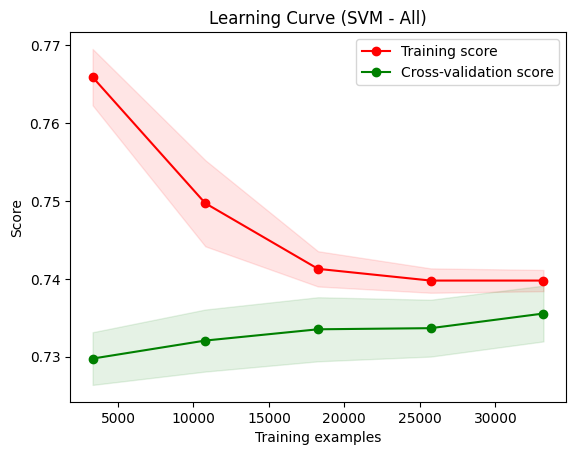

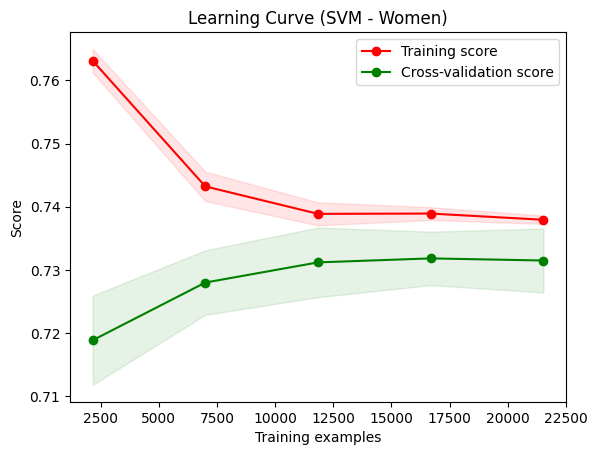

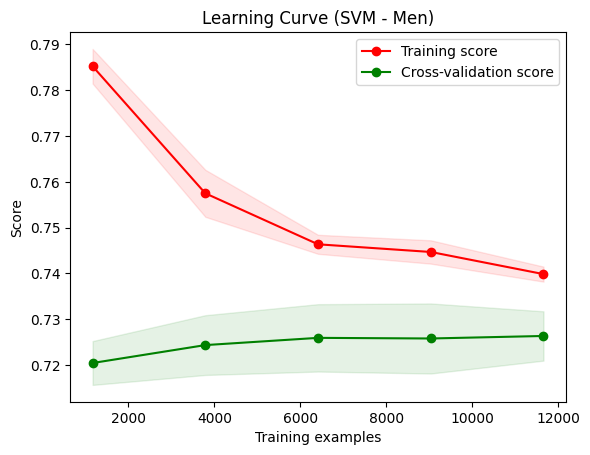

In [ ]:
# Plot learning curve for each model
plot_learning_curve(svm_model_all, "Learning Curve (SVM - All)", X_train_all, y_train_all, cv=5, n_jobs=4)
plot_learning_curve(svm_model_women, "Learning Curve (SVM - Women)", X_train_women, y_train_women, cv=5, n_jobs=4)
plot_learning_curve(svm_model_men, "Learning Curve (SVM - Men)", X_train_men, y_train_men, cv=5, n_jobs=4)

In [ ]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

def get_feature_importance(model, X_val, y_val, feature_names):
    result = permutation_importance(model, X_val, y_val, n_repeats=3, random_state=42)
    sorted_importances = sorted(zip(feature_names, result.importances_mean), key=lambda x: x[1], reverse=True)

    print(f"Feature Importances for {type(model).__name__}:")
    for feature, importance in sorted_importances:
        print(f"{feature}: {importance:.4f}")

def plot_feature_importance(model, X_val, y_val, feature_names, model_name):
    result = permutation_importance(model, X_val, y_val, n_repeats=3, random_state=42)
    sorted_idx = result.importances_mean.argsort()

    plt.figure(figsize=(10, len(sorted_idx) / 2))
    plt.barh(range(len(sorted_idx)), result.importances_mean[sorted_idx], align='center')
    plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
    plt.xlabel('Permutation Importance')
    plt.title(f'Feature Importance for {model_name}')
    plt.show()

Feature Importances for SVC:
ap_hi: 0.1196
cholesterol: 0.0321
bp_category_encoded: 0.0138
ap_lo: 0.0135
age_years: 0.0094
weight: 0.0018
gluc: 0.0013
bmi: 0.0013
height: 0.0010
active: 0.0010
gender: 0.0003
smoke: 0.0001
alco: -0.0004


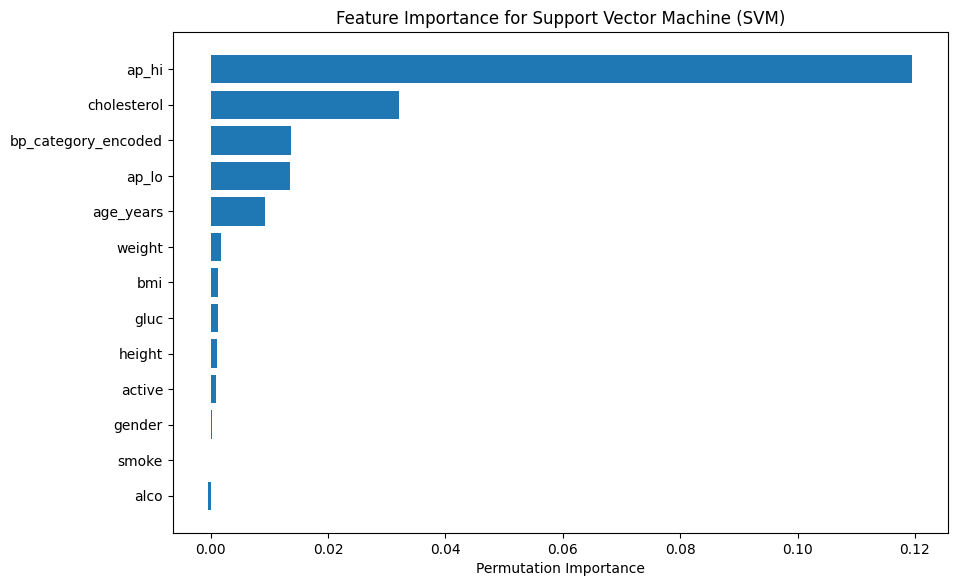

In [ ]:
get_feature_importance(svm_model_all, X_val_all, y_val_all, X_all.columns)
plot_feature_importance(svm_model_all, X_val_all, y_val_all, X_all.columns, "Support Vector Machine (SVM)")

Feature Importances for SVC:
ap_hi: 0.1171
cholesterol: 0.0384
bp_category_encoded: 0.0208
age_years: 0.0170
ap_lo: 0.0155
height: 0.0013
active: 0.0009
gluc: 0.0003
smoke: -0.0002
alco: -0.0006
bmi: -0.0010
weight: -0.0012


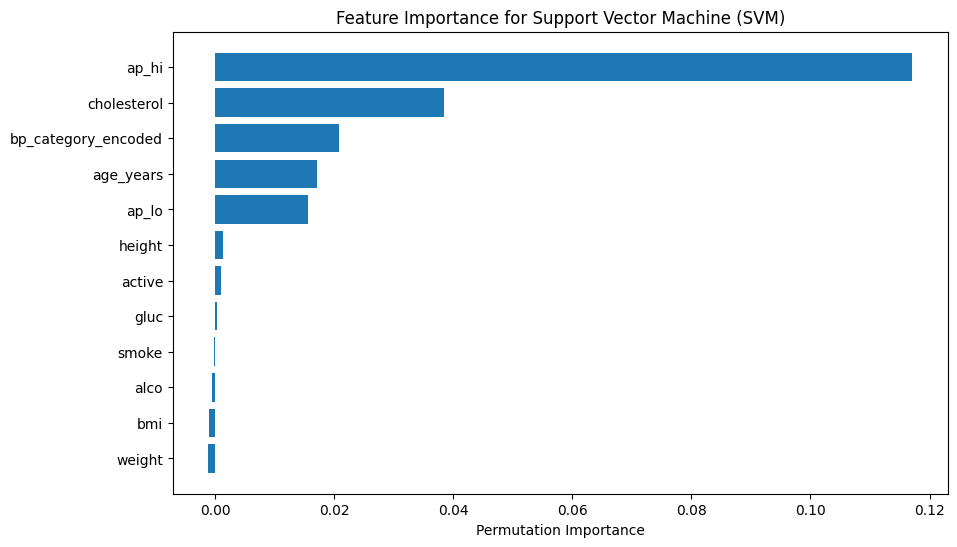

In [ ]:
get_feature_importance(svm_model_women, X_val_women, y_val_women, X_women.columns)
plot_feature_importance(svm_model_women, X_val_women, y_val_women, X_women.columns, "Support Vector Machine (SVM)")

Feature Importances for SVC:
ap_hi: 0.1427
ap_lo: 0.0308
cholesterol: 0.0284
age_years: 0.0144
bp_category_encoded: 0.0124
active: 0.0019
smoke: 0.0001
bmi: 0.0001
alco: -0.0008
gluc: -0.0022
weight: -0.0023
height: -0.0036


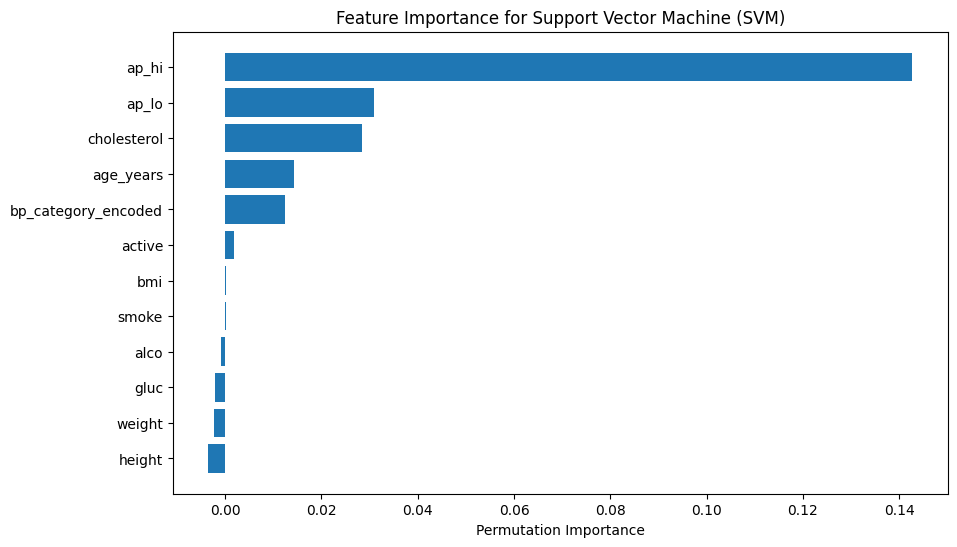

In [ ]:
get_feature_importance(svm_model_men, X_val_men, y_val_men, X_men.columns)
plot_feature_importance(svm_model_men, X_val_men, y_val_men, X_men.columns, "Support Vector Machine (SVM)")

## 2. KNN with Hyperparameter Tuning

In [ ]:
knn_param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn_grid_search_all = GridSearchCV(KNeighborsClassifier(), knn_param_grid, cv=5, n_jobs=-1)
knn_grid_search_women = GridSearchCV(KNeighborsClassifier(), knn_param_grid, cv=5, n_jobs=-1)
knn_grid_search_men = GridSearchCV(KNeighborsClassifier(), knn_param_grid, cv=5, n_jobs=-1)

In [ ]:
knn_grid_search_all.fit(X_train_all, y_train_all)
best_params_svm_all = KNeighborsClassifier(**knn_grid_search_all.best_params_)
best_knn_model_all = knn_grid_search_all.best_estimator_

In [ ]:
knn_model_all = best_knn_model_all

with open('knn_model_all.pkl', 'wb') as file:
    pickle.dump(knn_model_all, file)

print("Model saved successfully!")

Model saved successfully!


In [ ]:
knn_grid_search_women.fit(X_train_women, y_train_women)
best_params_knn_women = KNeighborsClassifier(**knn_grid_search_women.best_params_)
best_knn_model_women = knn_grid_search_women.best_estimator_

In [ ]:
knn_model_women = best_knn_model_women

with open('knn_model_women.pkl', 'wb') as file:
    pickle.dump(knn_model_women, file)

print("Model saved successfully!")

Model saved successfully!


In [ ]:
knn_grid_search_men.fit(X_train_men, y_train_men)
best_params_knn_men = KNeighborsClassifier(**knn_grid_search_men.best_params_)
best_knn_model_men = knn_grid_search_men.best_estimator_

In [ ]:
knn_model_men = best_knn_model_men

with open('knn_model_men.pkl', 'wb') as file:
    pickle.dump(knn_model_men, file)

print("Model saved successfully!")

Model saved successfully!


In [ ]:
# Entire Data
y_pred_knn_tuned_all = best_knn_model_all.predict(X_val_all)

# Women's Data
y_pred_knn_tuned_women = best_knn_model_women.predict(X_val_women)

# Men's Data
y_pred_knn_tuned_men = best_knn_model_men.predict(X_val_men)

# Evaluating the models
print("KNN Model:")
evaluate_model(y_val_all, y_pred_knn_tuned_all, "Entire Data")
if not X_train_women.empty:
    evaluate_model(y_val_women, y_pred_knn_tuned_women, "Women's Data")
if not X_train_men.empty:
    evaluate_model(y_val_men, y_pred_knn_tuned_men, "Men's Data")

KNN Model:
------ Entire Data ------
Accuracy: 0.6951
Precision: 0.6886
Recall: 0.6706
F1-Score: 0.6795
ROC-AUC: 0.6942
Confusion Matrix:
[[3857 1516]
 [1647 3353]]


------ Women's Data ------
Accuracy: 0.7153
Precision: 0.7085
Recall: 0.6891
F1-Score: 0.6986
ROC-AUC: 0.7142
Confusion Matrix:
[[2593  914]
 [1002 2221]]


------ Men's Data ------
Accuracy: 0.7027
Precision: 0.7098
Recall: 0.6796
F1-Score: 0.6943
ROC-AUC: 0.7026
Confusion Matrix:
[[1330  503]
 [ 580 1230]]




In [ ]:
# Load the KNN models from their pickle files
with open('/content/knn_model_all.pkl', 'rb') as file:
    knn_model_all = pickle.load(file)

with open('/content/knn_model_women.pkl', 'rb') as file:
    knn_model_women = pickle.load(file)

with open('/content/knn_model_men.pkl', 'rb') as file:
    knn_model_men = pickle.load(file)

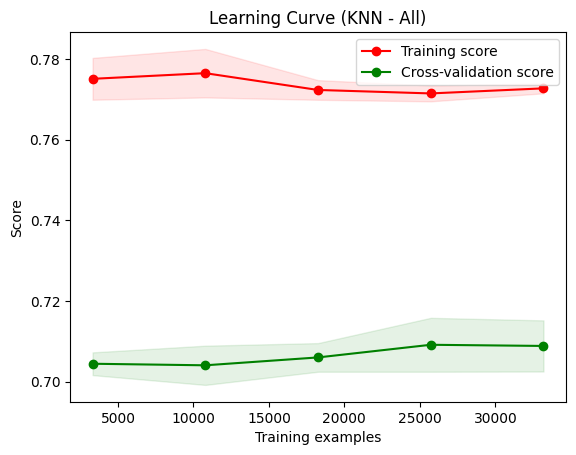

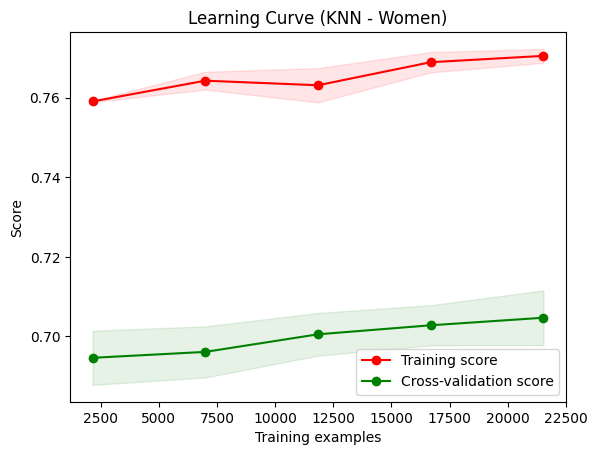

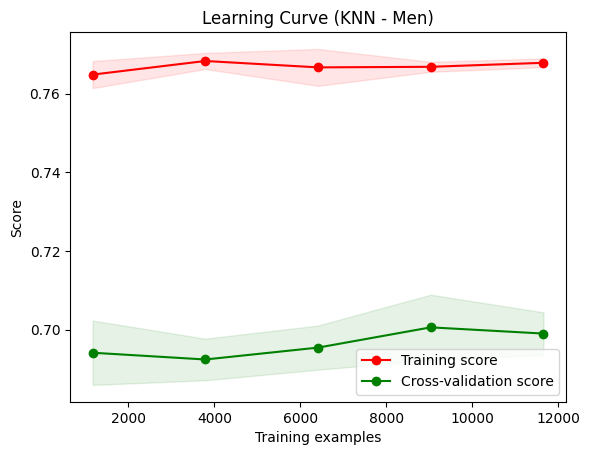

In [ ]:
# Plot learning curve for each model
plot_learning_curve(knn_model_all, "Learning Curve (KNN - All)", X_train_all, y_train_all, cv=5, n_jobs=4)
plot_learning_curve(knn_model_women, "Learning Curve (KNN - Women)", X_train_women, y_train_women, cv=5, n_jobs=4)
plot_learning_curve(knn_model_men, "Learning Curve (KNN - Men)", X_train_men, y_train_men, cv=5, n_jobs=4)

Feature Importances for KNeighborsClassifier:
ap_hi: 0.0864
cholesterol: 0.0308
age_years: 0.0254
ap_lo: 0.0138
bp_category_encoded: 0.0074
gender: 0.0033
active: 0.0028
gluc: 0.0019
smoke: 0.0019
height: 0.0007
bmi: 0.0001
alco: -0.0001
weight: -0.0007


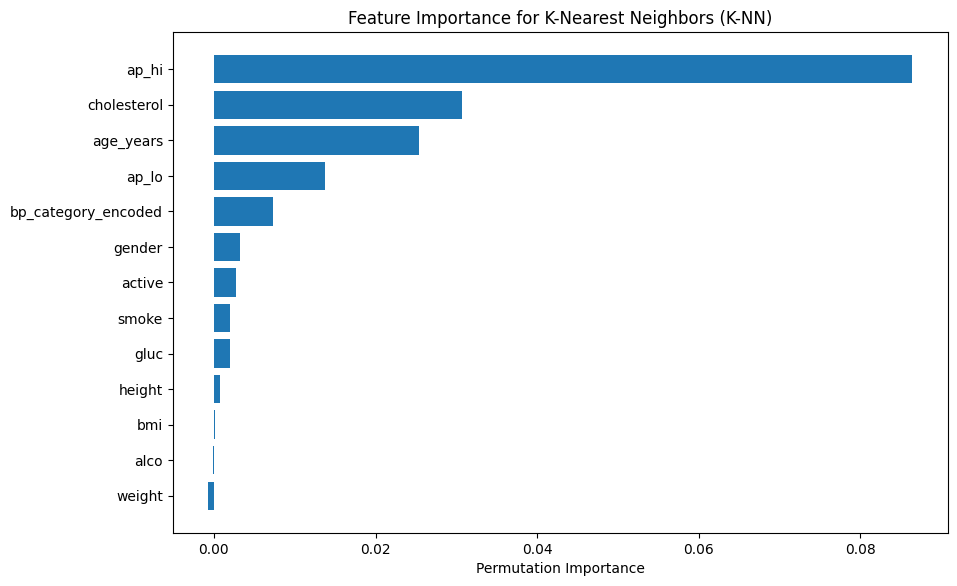

In [ ]:
get_feature_importance(knn_model_all, X_val_all, y_val_all, X_all.columns)
plot_feature_importance(knn_model_all, X_val_all, y_val_all, X_all.columns, "K-Nearest Neighbors (K-NN)")

Feature Importances for KNeighborsClassifier:
ap_hi: 0.0883
cholesterol: 0.0291
age_years: 0.0282
ap_lo: 0.0140
bp_category_encoded: 0.0131
weight: 0.0064
bmi: 0.0045
height: 0.0043
gluc: 0.0030
active: 0.0012
smoke: 0.0002
alco: -0.0016


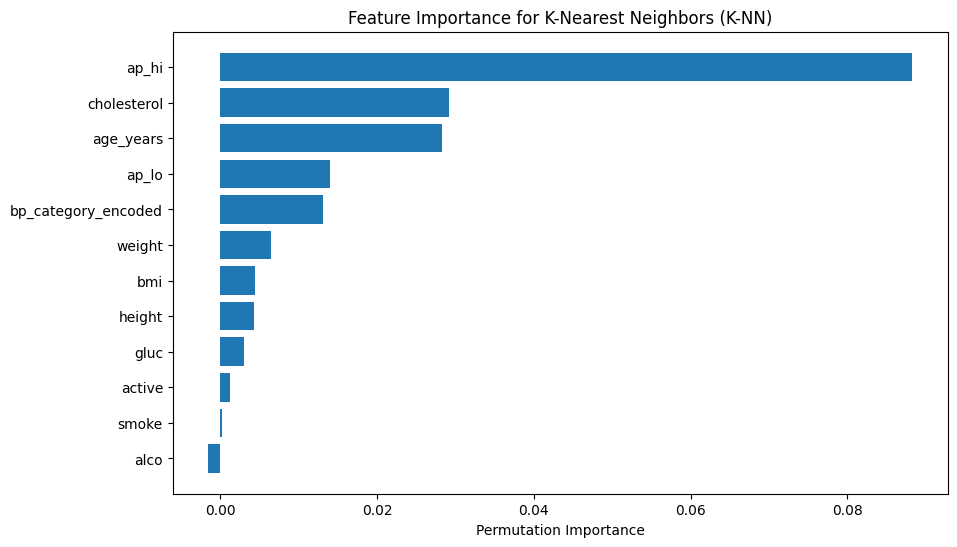

In [ ]:
get_feature_importance(knn_model_women, X_val_women, y_val_women, X_women.columns)
plot_feature_importance(knn_model_women, X_val_women, y_val_women, X_women.columns, "K-Nearest Neighbors (K-NN)")

Feature Importances for KNeighborsClassifier:
ap_hi: 0.0945
age_years: 0.0308
cholesterol: 0.0224
ap_lo: 0.0177
bp_category_encoded: 0.0106
active: 0.0071
alco: 0.0030
weight: -0.0002
height: -0.0002
smoke: -0.0004
gluc: -0.0028
bmi: -0.0034


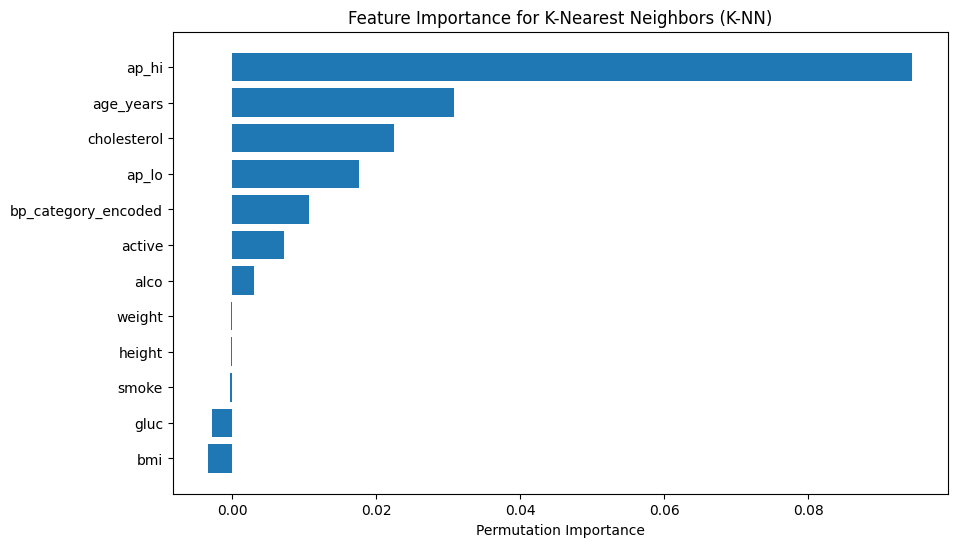

In [ ]:
get_feature_importance(knn_model_men, X_val_men, y_val_men, X_men.columns)
plot_feature_importance(knn_model_men, X_val_men, y_val_men, X_men.columns, "K-Nearest Neighbors (K-NN)")

## 3. XGBoost with Hyperparameter Tuning

In [ ]:
xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

xgb_grid_search_all = GridSearchCV(xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'), xgb_param_grid, cv=5, n_jobs=-1)
xgb_grid_search_women = GridSearchCV(xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'), xgb_param_grid, cv=5, n_jobs=-1)
xgb_grid_search_men = GridSearchCV(xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'), xgb_param_grid, cv=5, n_jobs=-1)

In [ ]:
xgb_grid_search_all.fit(X_train_all, y_train_all)
best_xgb_params_all = xgb_grid_search_all.best_params_
best_xgb_model_all = xgb_grid_search_all.best_estimator_

In [ ]:
xgb_model_all = best_xgb_model_all

with open('xgb_model_all.pkl', 'wb') as file:
    pickle.dump(xgb_model_all, file)

print("Model saved successfully!")

Model saved successfully!


In [ ]:
xgb_grid_search_women.fit(X_train_women, y_train_women)
best_xgb_params_women = xgb_grid_search_women.best_params_
best_xgb_model_women = xgb_grid_search_women.best_estimator_

In [ ]:
xgb_model_women = best_xgb_model_women

with open('xgb_model_women.pkl', 'wb') as file:
    pickle.dump(xgb_model_women, file)

print("Model saved successfully!")

Model saved successfully!


In [ ]:
xgb_grid_search_men.fit(X_train_men, y_train_men)
best_xgb_params_men = xgb_grid_search_men.best_params_
best_xgb_model_men = xgb_grid_search_men.best_estimator_

In [ ]:
xgb_model_men = best_xgb_model_men

with open('xgb_model_men.pkl', 'wb') as file:
    pickle.dump(xgb_model_men, file)

print("Model saved successfully!")

Model saved successfully!


In [ ]:
# Entire Data
y_pred_xgb_tuned_all = best_xgb_model_all.predict(X_val_all)

# Women's Data
y_pred_xgb_tuned_women = best_xgb_model_women.predict(X_val_women)

# Men's Data
y_pred_xgb_tuned_men = best_xgb_model_men.predict(X_val_men)

# Evaluating the models
print("XGBoost Model:")
evaluate_model(y_val_all, y_pred_xgb_tuned_all, "Entire Data")
if not X_train_women.empty:
    evaluate_model(y_val_women, y_pred_xgb_tuned_women, "Women's Data")
if not X_train_men.empty:
    evaluate_model(y_val_men, y_pred_xgb_tuned_men, "Men's Data")

XGBoost Model:
------ Entire Data ------
Accuracy: 0.7240
Precision: 0.7397
Recall: 0.6594
F1-Score: 0.6973
ROC-AUC: 0.7218
Confusion Matrix:
[[4213 1160]
 [1703 3297]]


------ Women's Data ------
Accuracy: 0.7403
Precision: 0.7504
Recall: 0.6857
F1-Score: 0.7166
ROC-AUC: 0.7381
Confusion Matrix:
[[2772  735]
 [1013 2210]]


------ Men's Data ------
Accuracy: 0.7395
Precision: 0.7768
Recall: 0.6674
F1-Score: 0.7180
ROC-AUC: 0.7390
Confusion Matrix:
[[1486  347]
 [ 602 1208]]




In [ ]:
# Load the SVM models from their pickle files
with open('/content/xgb_model_all.pkl', 'rb') as file:
    xgb_model_all = pickle.load(file)

with open('/content/xgb_model_women.pkl', 'rb') as file:
    xgb_model_women = pickle.load(file)

with open('/content/xgb_model_men.pkl', 'rb') as file:
    xgb_model_men = pickle.load(file)

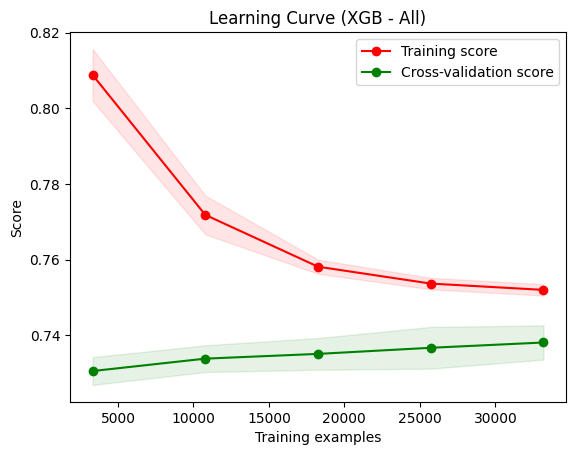

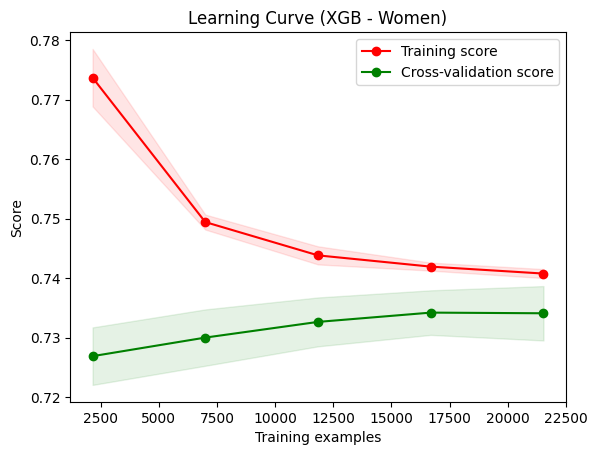

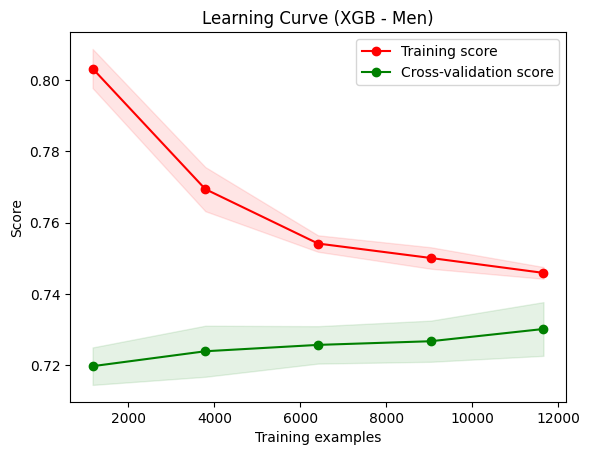

In [ ]:
# Plot learning curve for each model
plot_learning_curve(xgb_model_all, "Learning Curve (XGB - All)", X_train_all, y_train_all, cv=5, n_jobs=4)
plot_learning_curve(xgb_model_women, "Learning Curve (XGB - Women)", X_train_women, y_train_women, cv=5, n_jobs=4)
plot_learning_curve(xgb_model_men, "Learning Curve (XGB - Men)", X_train_men, y_train_men, cv=5, n_jobs=4)

Feature Importances for XGBClassifier:
ap_hi: 0.1318
cholesterol: 0.0264
age_years: 0.0219
ap_lo: 0.0036
gluc: 0.0023
active: 0.0015
smoke: 0.0011
bp_category_encoded: 0.0010
height: 0.0009
bmi: 0.0005
gender: 0.0002
alco: -0.0001
weight: -0.0007


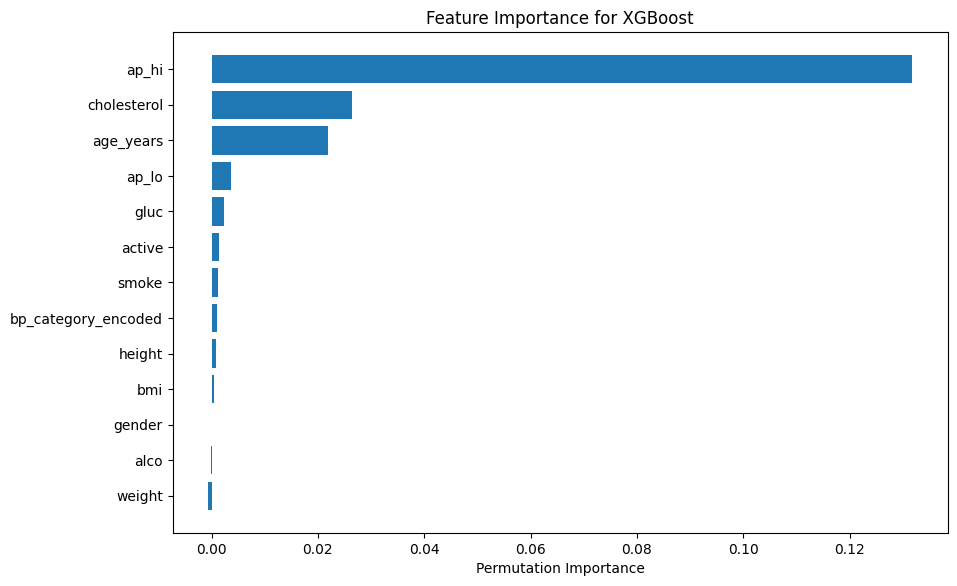

In [ ]:
get_feature_importance(xgb_model_all, X_val_all, y_val_all, X_all.columns)
plot_feature_importance(xgb_model_all, X_val_all, y_val_all, X_all.columns, "XGBoost")

Feature Importances for XGBClassifier:
ap_hi: 0.1375
cholesterol: 0.0307
age_years: 0.0270
ap_lo: 0.0011
gluc: 0.0007
height: 0.0004
active: 0.0003
weight: 0.0001
bp_category_encoded: 0.0000
bmi: 0.0000
smoke: -0.0000
alco: -0.0006


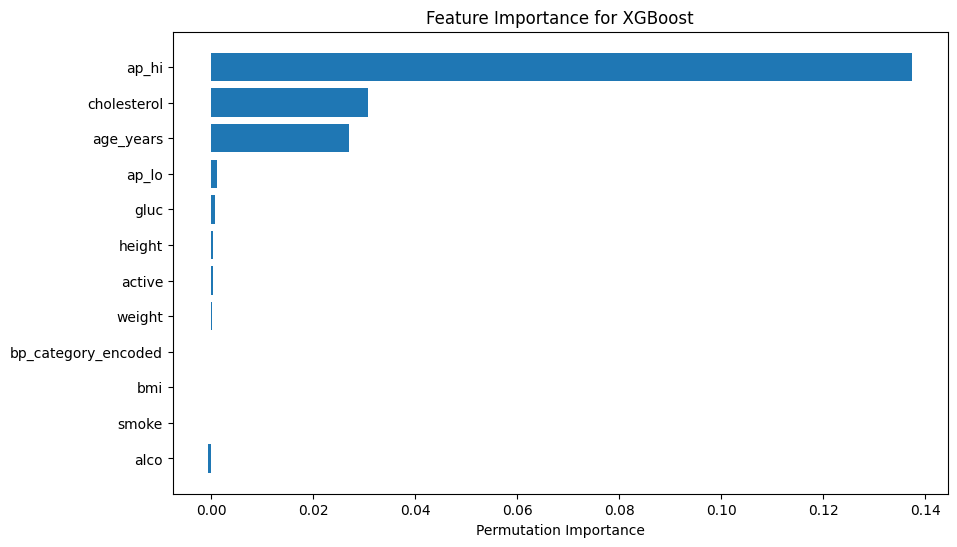

In [ ]:
get_feature_importance(xgb_model_women, X_val_women, y_val_women, X_women.columns)
plot_feature_importance(xgb_model_women, X_val_women, y_val_women, X_women.columns, "XGBoost")

Feature Importances for XGBClassifier:
ap_hi: 0.1717
age_years: 0.0231
cholesterol: 0.0188
ap_lo: 0.0047
height: 0.0030
active: 0.0027
smoke: 0.0016
weight: 0.0014
bp_category_encoded: 0.0011
gluc: -0.0002
alco: -0.0010
bmi: -0.0022


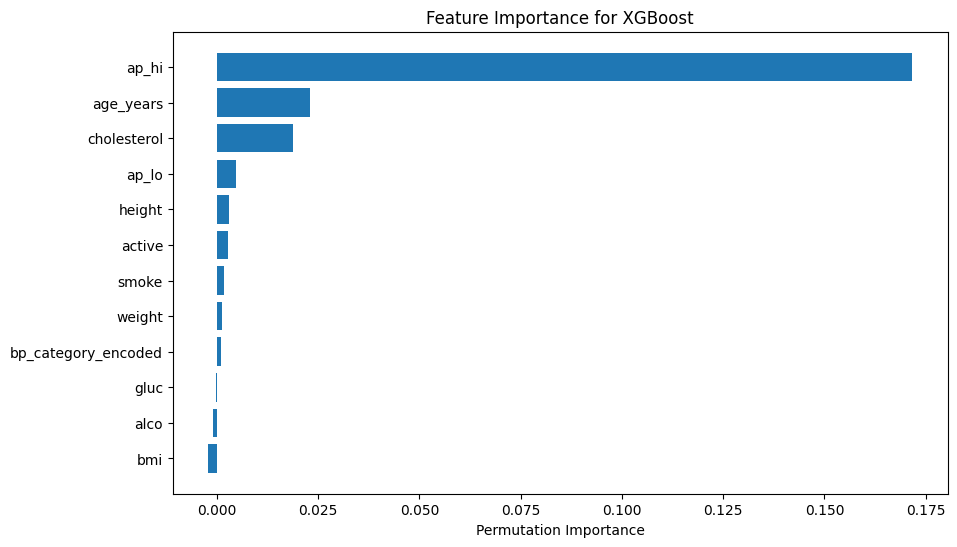

In [ ]:
get_feature_importance(xgb_model_men, X_val_men, y_val_men, X_men.columns)
plot_feature_importance(xgb_model_men, X_val_men, y_val_men, X_men.columns, "XGBoost")

## 4. Decision Tree with Hyperparameter Tuning

In [ ]:
# Decision Tree Parameter Grid
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}

dt_grid_search_all = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
dt_grid_search_women = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
dt_grid_search_men = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [ ]:
dt_grid_search_all.fit(X_train_all, y_train_all)
best_dt_params_all = dt_grid_search_all.best_params_
best_dt_model_all = dt_grid_search_all.best_estimator_

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


In [ ]:
dt_model_all = best_dt_model_all

with open('dt_model_all.pkl', 'wb') as file:
    pickle.dump(dt_model_all, file)

print("Model saved successfully!")

Model saved successfully!


In [ ]:
dt_grid_search_women.fit(X_train_women, y_train_women)
best_dt_params_women = dt_grid_search_women.best_params_
best_dt_model_women = dt_grid_search_women.best_estimator_

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


In [ ]:
dt_model_women = best_dt_model_women

with open('dt_model_women.pkl', 'wb') as file:
    pickle.dump(dt_model_women, file)

print("Model saved successfully!")

Model saved successfully!


In [ ]:
dt_grid_search_men.fit(X_train_men, y_train_men)
best_dt_params_men = dt_grid_search_men.best_params_
best_dt_model_men = dt_grid_search_men.best_estimator_

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


In [ ]:
dt_model_men = best_dt_model_men

with open('dt_model_men.pkl', 'wb') as file:
    pickle.dump(dt_model_men, file)

print("Model saved successfully!")

Model saved successfully!


In [ ]:
# Entire Data
y_pred_dt_tuned_all = best_dt_model_all.predict(X_val_all)

# Women's Data
y_pred_dt_tuned_women = best_dt_model_women.predict(X_val_women)

# Men's Data
y_pred_dt_tuned_men = best_dt_model_men.predict(X_val_men)

# Evaluating the models
print("Decision Tree:")
evaluate_model(y_val_all, y_pred_dt_tuned_all, "Entire Data")
if not X_train_women.empty:
    evaluate_model(y_val_women, y_pred_dt_tuned_women, "Women's Data")
if not X_train_men.empty:
    evaluate_model(y_val_men, y_pred_dt_tuned_men, "Men's Data")

Decision Tree:
------ Entire Data ------
Accuracy: 0.7134
Precision: 0.7362
Recall: 0.6318
F1-Score: 0.6800
ROC-AUC: 0.7106
Confusion Matrix:
[[4241 1132]
 [1841 3159]]


------ Women's Data ------
Accuracy: 0.7245
Precision: 0.7638
Recall: 0.6150
F1-Score: 0.6813
ROC-AUC: 0.7201
Confusion Matrix:
[[2894  613]
 [1241 1982]]


------ Men's Data ------
Accuracy: 0.7115
Precision: 0.7505
Recall: 0.6282
F1-Score: 0.6839
ROC-AUC: 0.7110
Confusion Matrix:
[[1455  378]
 [ 673 1137]]




In [ ]:
# Load the SVM models from their pickle files
with open('/content/dt_model_all.pkl', 'rb') as file:
    dt_model_all = pickle.load(file)

with open('/content/dt_model_women.pkl', 'rb') as file:
    dt_model_women = pickle.load(file)

with open('/content/dt_model_men.pkl', 'rb') as file:
    dt_model_men = pickle.load(file)

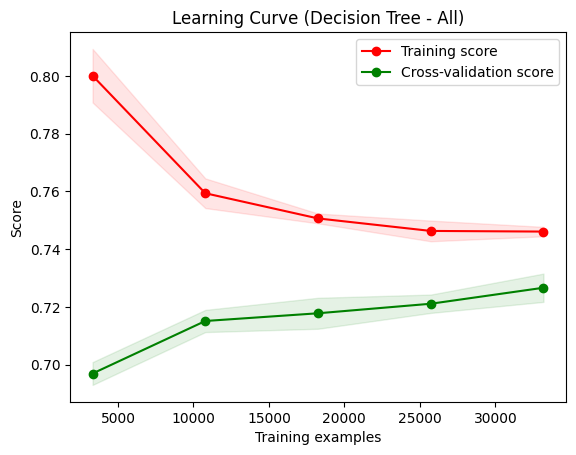

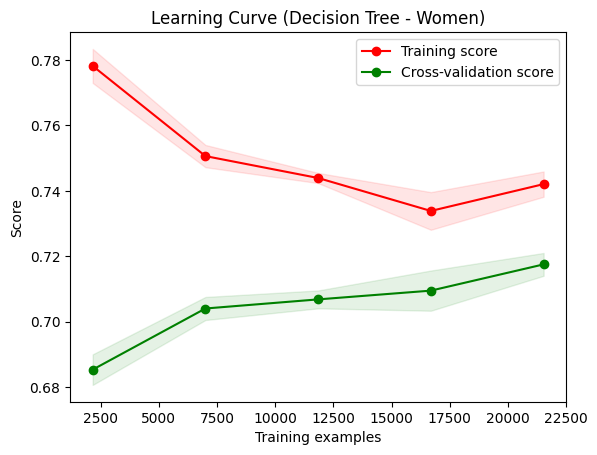

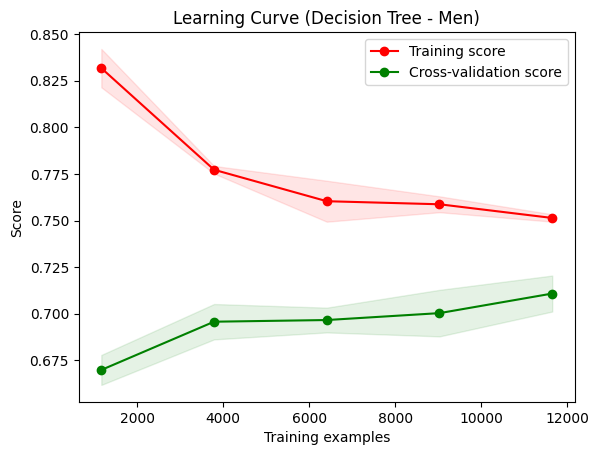

In [ ]:
# Plot learning curve for each model
plot_learning_curve(dt_model_all, "Learning Curve (Decision Tree - All)", X_train_all, y_train_all, cv=5, n_jobs=4)
plot_learning_curve(dt_model_women, "Learning Curve (Decision Tree - Women)", X_train_women, y_train_women, cv=5, n_jobs=4)
plot_learning_curve(dt_model_men, "Learning Curve (Decision Tree - Men)", X_train_men, y_train_men, cv=5, n_jobs=4)

Feature Importances for DecisionTreeClassifier:
ap_hi: 0.1596
age_years: 0.0211
cholesterol: 0.0178
ap_lo: 0.0143
weight: 0.0069
bmi: 0.0050
bp_category_encoded: 0.0025
gluc: 0.0018
active: 0.0017
smoke: 0.0015
height: 0.0005
gender: 0.0004
alco: -0.0002


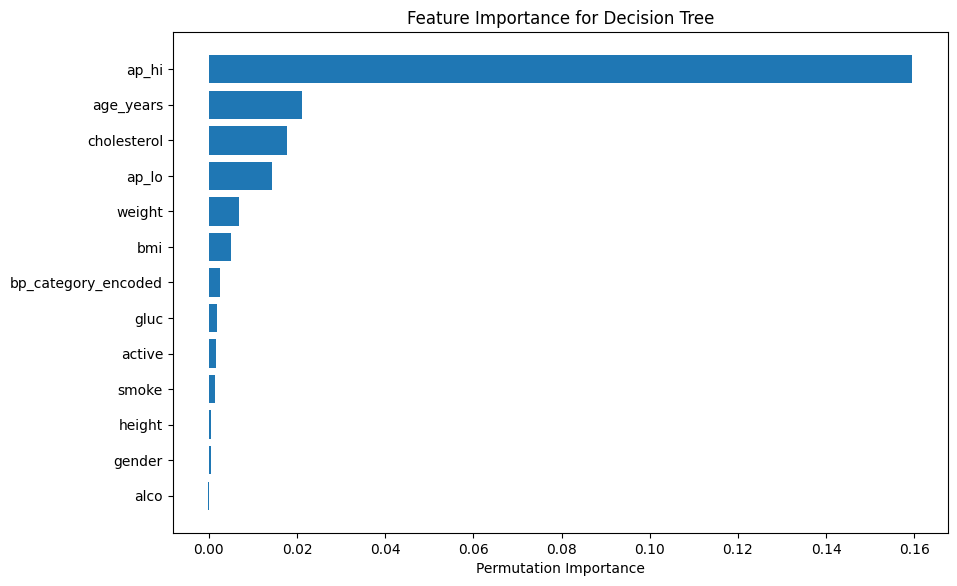

In [ ]:
get_feature_importance(dt_model_all, X_val_all, y_val_all, X_all.columns)
plot_feature_importance(dt_model_all, X_val_all, y_val_all, X_all.columns, "Decision Tree")

Feature Importances for DecisionTreeClassifier:
ap_hi: 0.0958
ap_lo: 0.0707
cholesterol: 0.0305
bp_category_encoded: 0.0213
age_years: 0.0173
bmi: 0.0069
weight: 0.0007
height: 0.0004
alco: -0.0000
smoke: -0.0001
active: -0.0006
gluc: -0.0028


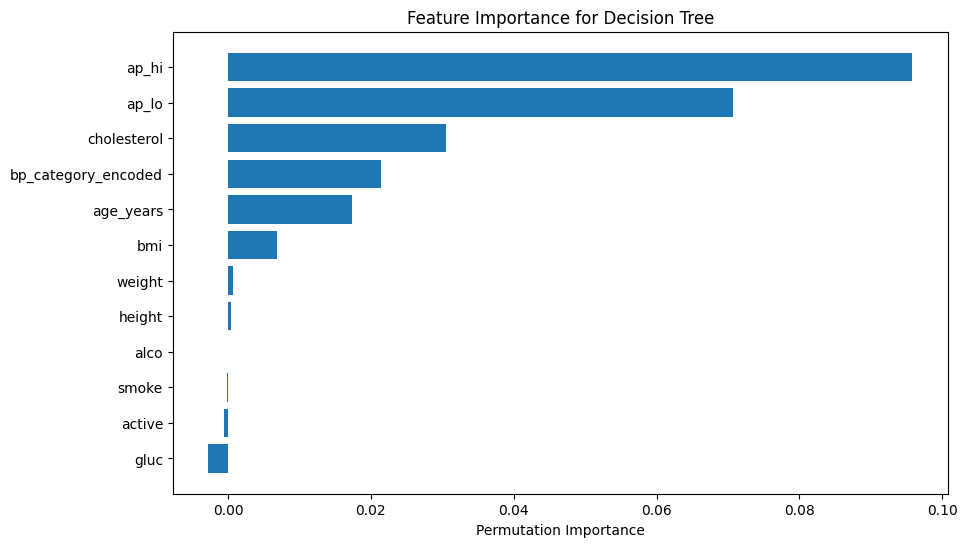

In [ ]:
get_feature_importance(dt_model_women, X_val_women, y_val_women, X_women.columns)
plot_feature_importance(dt_model_women, X_val_women, y_val_women, X_women.columns, "Decision Tree")

Feature Importances for DecisionTreeClassifier:
ap_hi: 0.1293
ap_lo: 0.0716
cholesterol: 0.0311
bp_category_encoded: 0.0271
age_years: 0.0221
bmi: 0.0182
active: 0.0088
height: 0.0073
weight: 0.0042
gluc: 0.0021
alco: 0.0013
smoke: 0.0005


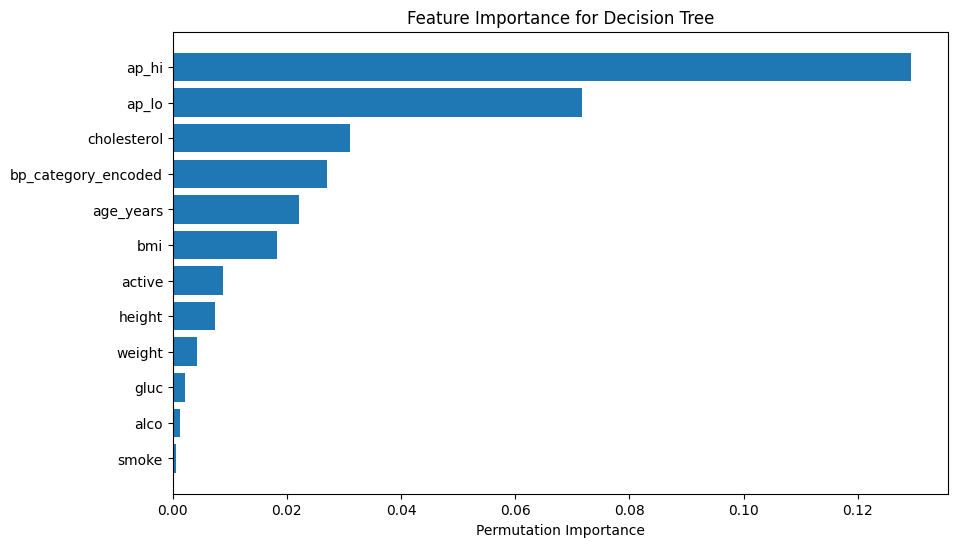

In [ ]:
get_feature_importance(dt_model_men, X_val_men, y_val_men, X_men.columns)
plot_feature_importance(dt_model_men, X_val_men, y_val_men, X_men.columns, "Decision Tree")

## 5. Random Forest with Hyperparameter Tuning




In [ ]:
# Random Forest Parameter Grid
rf_param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}

rf_grid_search_all = GridSearchCV(rf, rf_param_grid, cv=10, scoring='accuracy', n_jobs=-1)
rf_grid_search_women = GridSearchCV(rf, rf_param_grid, cv=10, scoring='accuracy', n_jobs=-1)
rf_grid_search_men = GridSearchCV(rf, rf_param_grid, cv=10, scoring='accuracy', n_jobs=-1)

In [ ]:
rf_grid_search_all.fit(X_train_all, y_train_all)
best_rf_params_all = rf_grid_search_all.best_params_
best_rf_model_all = rf_grid_search_all.best_estimator_

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [ ]:
rf_model_all = best_rf_model_all

with open('rf_model_all.pkl', 'wb') as file:
    pickle.dump(rf_model_all, file)

print("Model saved successfully!")

Model saved successfully!


In [ ]:
rf_grid_search_women.fit(X_train_women, y_train_women)
best_rf_params_women = rf_grid_search_women.best_params_
best_rf_model_women = rf_grid_search_women.best_estimator_

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [ ]:
rf_model_women = best_rf_model_women

with open('rf_model_women.pkl', 'wb') as file:
    pickle.dump(rf_model_women, file)

print("Model saved successfully!")

Model saved successfully!


In [ ]:
rf_grid_search_men.fit(X_train_men, y_train_men)
best_rf_params_men = rf_grid_search_men.best_params_
best_rf_model_men = rf_grid_search_men.best_estimator_

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [ ]:
rf_model_men = best_rf_model_men

with open('rf_model_men.pkl', 'wb') as file:
    pickle.dump(rf_model_men, file)

print("Model saved successfully!")

Model saved successfully!


In [ ]:
# Entire Data
y_pred_rf_tuned_all = best_rf_model_all.predict(X_val_all)

# Women's Data
y_pred_rf_tuned_women = best_rf_model_women.predict(X_val_women)

# Men's Data
y_pred_rf_tuned_men = best_rf_model_men.predict(X_val_men)

# Evaluating the models
print("Random Forest:")
evaluate_model(y_val_all, y_pred_rf_tuned_all, "Entire Data")
if not X_train_women.empty:
    evaluate_model(y_val_women, y_pred_rf_tuned_women, "Women's Data")
if not X_train_men.empty:
    evaluate_model(y_val_men, y_pred_rf_tuned_men, "Men's Data")

Random Forest:
------ Entire Data ------
Accuracy: 0.7226
Precision: 0.7404
Recall: 0.6538
F1-Score: 0.6944
ROC-AUC: 0.7203
Confusion Matrix:
[[4227 1146]
 [1731 3269]]


------ Women's Data ------
Accuracy: 0.7400
Precision: 0.7492
Recall: 0.6869
F1-Score: 0.7167
ROC-AUC: 0.7378
Confusion Matrix:
[[2766  741]
 [1009 2214]]


------ Men's Data ------
Accuracy: 0.7376
Precision: 0.7773
Recall: 0.6613
F1-Score: 0.7146
ROC-AUC: 0.7371
Confusion Matrix:
[[1490  343]
 [ 613 1197]]




In [ ]:
# Load the SVM models from their pickle files
with open('/content/rf_model_all.pkl', 'rb') as file:
    rf_model_all = pickle.load(file)

with open('/content/rf_model_women.pkl', 'rb') as file:
    rf_model_women = pickle.load(file)

with open('/content/rf_model_men.pkl', 'rb') as file:
    rf_model_men = pickle.load(file)

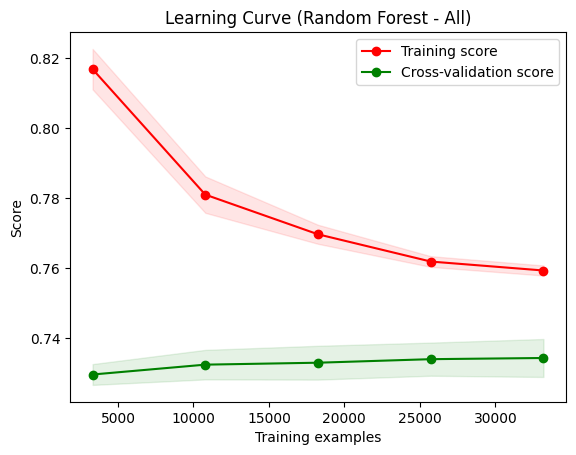

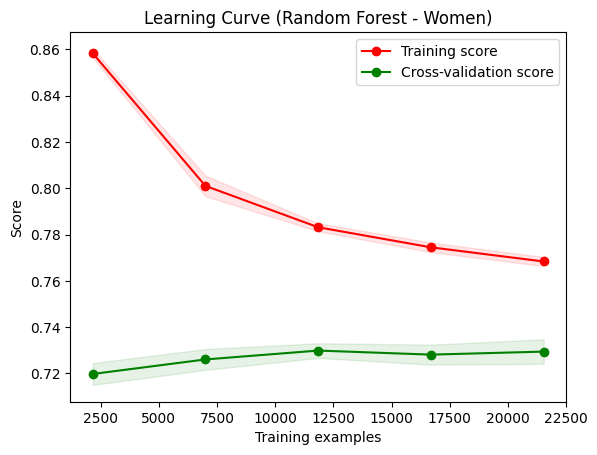

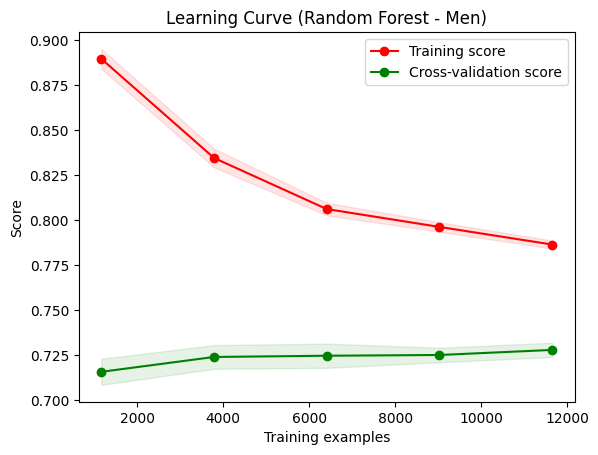

In [ ]:
# Plot learning curve for each model
plot_learning_curve(rf_model_all, "Learning Curve (Random Forest - All)", X_train_all, y_train_all, cv=5, n_jobs=4)
plot_learning_curve(rf_model_women, "Learning Curve (Random Forest - Women)", X_train_women, y_train_women, cv=5, n_jobs=4)
plot_learning_curve(rf_model_men, "Learning Curve (Random Forest - Men)", X_train_men, y_train_men, cv=5, n_jobs=4)

Feature Importances for SVC:
ap_hi: 0.1196
cholesterol: 0.0321
bp_category_encoded: 0.0138
ap_lo: 0.0135
age_years: 0.0094
weight: 0.0018
gluc: 0.0013
bmi: 0.0013
height: 0.0010
active: 0.0010
gender: 0.0003
smoke: 0.0001
alco: -0.0004


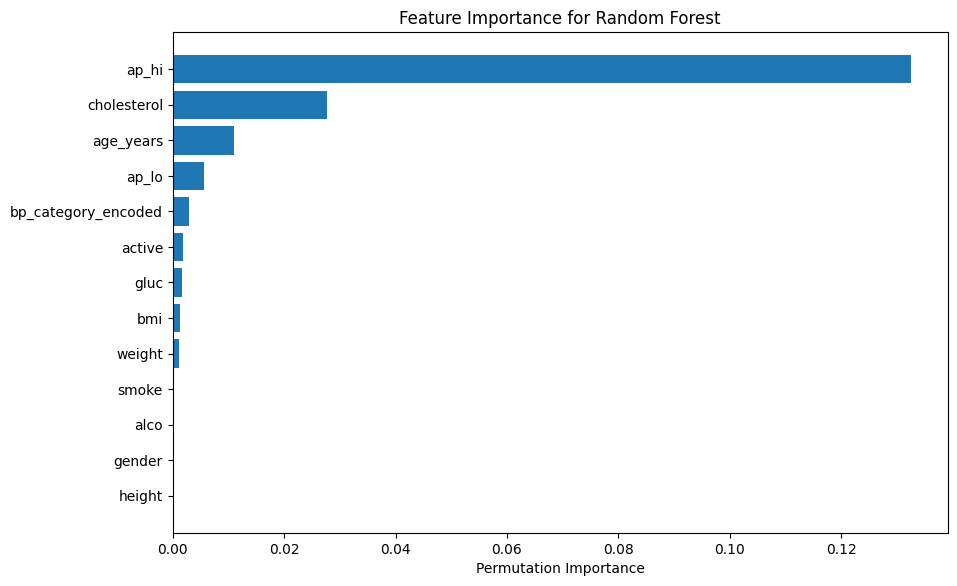

In [ ]:
get_feature_importance(svm_model_all, X_val_all, y_val_all, X_all.columns)
plot_feature_importance(rf_model_all, X_val_all, y_val_all, X_all.columns, "Random Forest")

Feature Importances for SVC:
ap_hi: 0.1171
cholesterol: 0.0384
bp_category_encoded: 0.0208
age_years: 0.0170
ap_lo: 0.0155
height: 0.0013
active: 0.0009
gluc: 0.0003
smoke: -0.0002
alco: -0.0006
bmi: -0.0010
weight: -0.0012


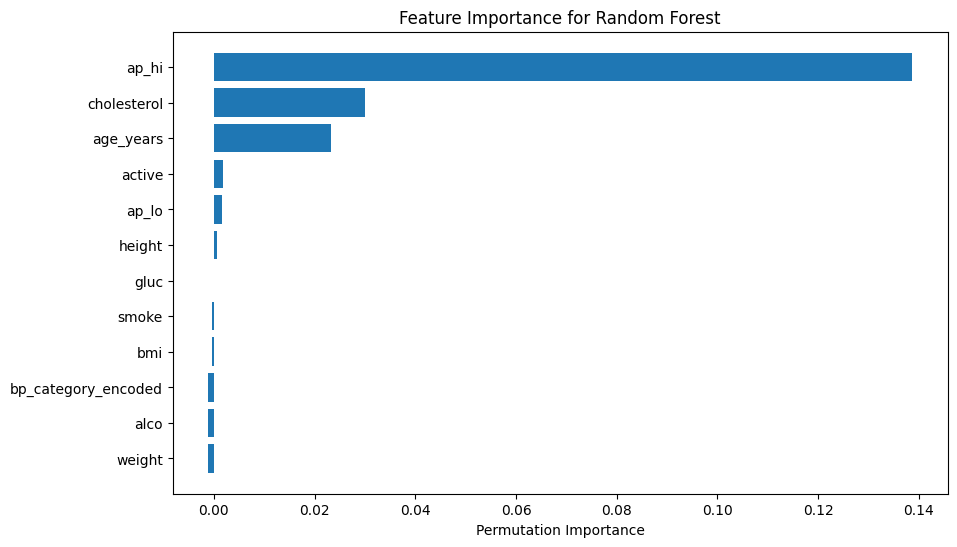

In [ ]:
get_feature_importance(svm_model_women, X_val_women, y_val_women, X_women.columns)
plot_feature_importance(rf_model_women, X_val_women, y_val_women, X_women.columns, "Random Forest")

Feature Importances for SVC:
ap_hi: 0.1427
ap_lo: 0.0308
cholesterol: 0.0284
age_years: 0.0144
bp_category_encoded: 0.0124
active: 0.0019
smoke: 0.0001
bmi: 0.0001
alco: -0.0008
gluc: -0.0022
weight: -0.0023
height: -0.0036


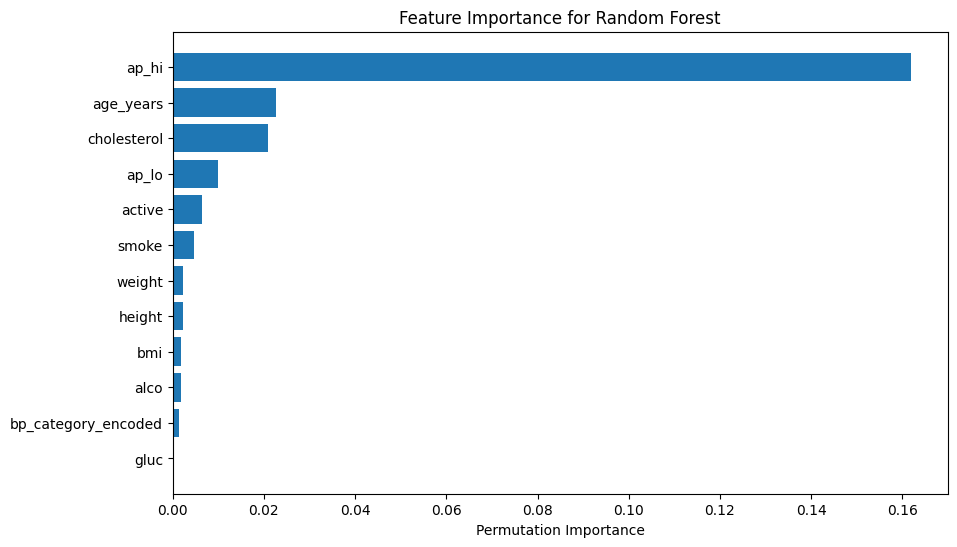

In [ ]:
get_feature_importance(svm_model_men, X_val_men, y_val_men, X_men.columns)
plot_feature_importance(rf_model_men, X_val_men, y_val_men, X_men.columns, "Random Forest")

## 6. Naive Bayes with Hyperparameter Tuning

In [ ]:
# Naive Bayes Parameter Grid
gnb_param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7]  # Example values for var_smoothing
}

gnb_grid_search_all = GridSearchCV(GaussianNB(), gnb_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
gnb_grid_search_women = GridSearchCV(GaussianNB(), gnb_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
gnb_grid_search_men = GridSearchCV(GaussianNB(), gnb_param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [ ]:
gnb_grid_search_all.fit(X_train_all, y_train_all)
best_gnb_params_all = gnb_grid_search_all.best_params_
best_gnb_model_all = gnb_grid_search_all.best_estimator_

In [ ]:
gnb_model_all = best_gnb_model_all

with open('gnb_model_all.pkl', 'wb') as file:
    pickle.dump(gnb_model_all, file)

print("Model saved successfully!")

Model saved successfully!


In [ ]:
gnb_grid_search_women.fit(X_train_women, y_train_women)
best_gnb_params_women = gnb_grid_search_women.best_params_
best_gnb_model_women = gnb_grid_search_women.best_estimator_

In [ ]:
gnb_model_women = best_gnb_model_women

with open('gnb_model_women.pkl', 'wb') as file:
    pickle.dump(gnb_model_women, file)

print("Model saved successfully!")

Model saved successfully!


In [ ]:
gnb_grid_search_men.fit(X_train_men, y_train_men)
best_gnb_params_men = gnb_grid_search_men.best_params_
best_gnb_model_men = gnb_grid_search_men.best_estimator_

In [ ]:
gnb_model_men = best_gnb_model_men

with open('gnb_model_men.pkl', 'wb') as file:
    pickle.dump(gnb_model_men, file)

print("Model saved successfully!")

Model saved successfully!


In [ ]:
# Entire Data
y_pred_gnb_tuned_all = best_gnb_model_all.predict(X_val_all)

# Women's Data
y_pred_gnb_tuned_women = best_gnb_model_women.predict(X_val_women)

# Men's Data
y_pred_gnb_tuned_men = best_gnb_model_men.predict(X_val_men)

# Evaluating the models
print("Naive Bayes:")
evaluate_model(y_val_all, y_pred_gnb_tuned_all, "Entire Data")
if not X_train_women.empty:
    evaluate_model(y_val_women, y_pred_gnb_tuned_women, "Women's Data")
if not X_train_men.empty:
    evaluate_model(y_val_men, y_pred_gnb_tuned_men, "Men's Data")

Naive Bayes:
------ Entire Data ------
Accuracy: 0.7101
Precision: 0.7297
Recall: 0.6332
F1-Score: 0.6780
ROC-AUC: 0.7074
Confusion Matrix:
[[4200 1173]
 [1834 3166]]


------ Women's Data ------
Accuracy: 0.7202
Precision: 0.7334
Recall: 0.6531
F1-Score: 0.6910
ROC-AUC: 0.7175
Confusion Matrix:
[[2742  765]
 [1118 2105]]


------ Men's Data ------
Accuracy: 0.7131
Precision: 0.7511
Recall: 0.6320
F1-Score: 0.6865
ROC-AUC: 0.7126
Confusion Matrix:
[[1454  379]
 [ 666 1144]]




In [ ]:
# Load the SVM models from their pickle files
with open('/content/gnb_model_all.pkl', 'rb') as file:
    gnb_model_all = pickle.load(file)

with open('/content/gnb_model_women.pkl', 'rb') as file:
    gnb_model_women = pickle.load(file)

with open('/content/gnb_model_men.pkl', 'rb') as file:
    gnb_model_men = pickle.load(file)

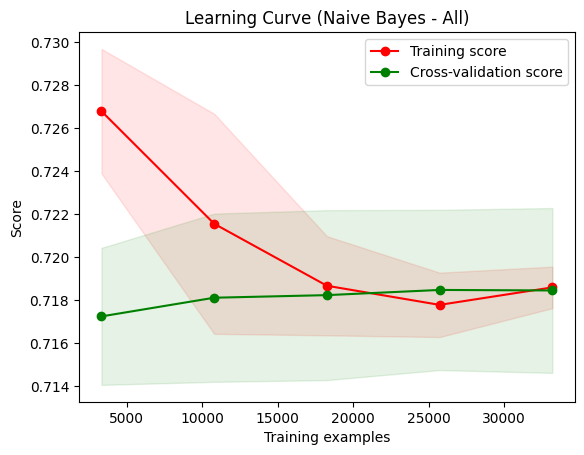

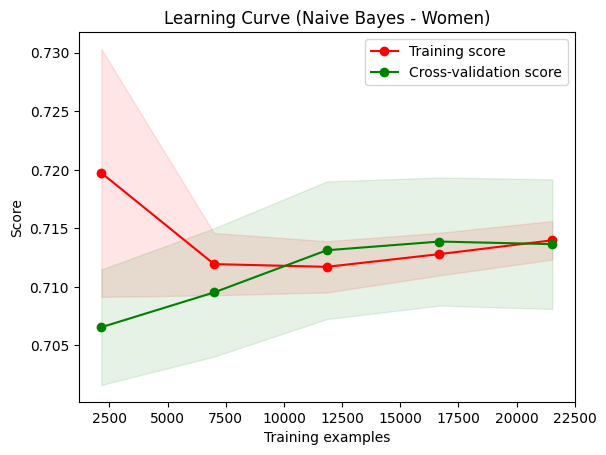

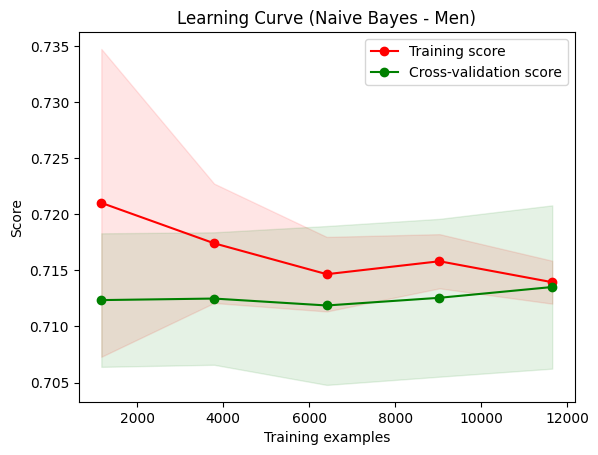

In [ ]:
# Plot learning curve for each model
plot_learning_curve(gnb_model_all, "Learning Curve (Naive Bayes - All)", X_train_all, y_train_all, cv=5, n_jobs=4)
plot_learning_curve(gnb_model_women, "Learning Curve (Naive Bayes - Women)", X_train_women, y_train_women, cv=5, n_jobs=4)
plot_learning_curve(gnb_model_men, "Learning Curve (Naive Bayes - Men)", X_train_men, y_train_men, cv=5, n_jobs=4)

Feature Importances for GaussianNB:
ap_hi: 0.0587
cholesterol: 0.0241
ap_lo: 0.0159
bp_category_encoded: 0.0111
age_years: 0.0090
gluc: 0.0037
smoke: 0.0025
bmi: 0.0024
active: 0.0020
alco: 0.0010
gender: 0.0007
weight: 0.0007
height: 0.0005


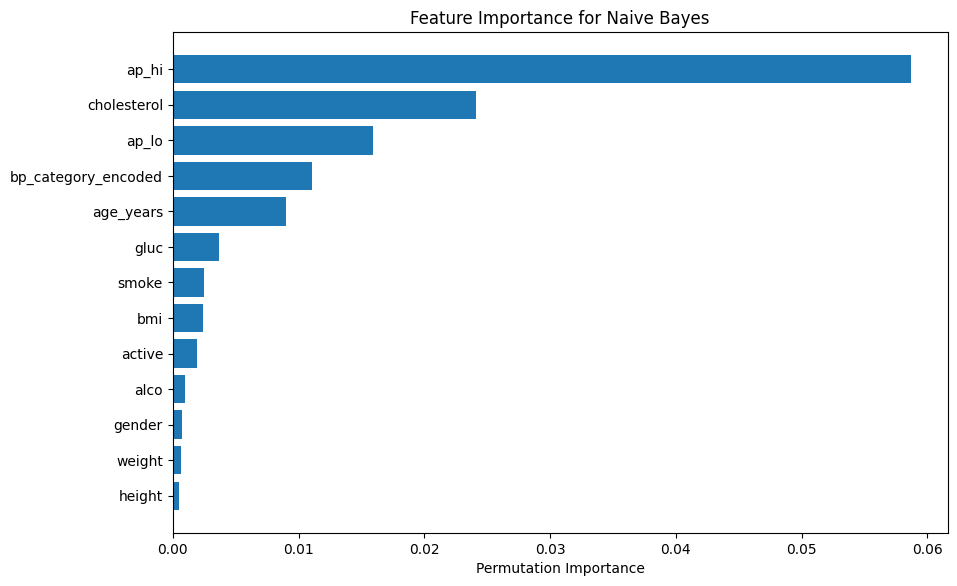

In [ ]:
get_feature_importance(gnb_model_all, X_val_all, y_val_all, X_all.columns)
plot_feature_importance(gnb_model_all, X_val_all, y_val_all, X_all.columns, "Naive Bayes")

Feature Importances for GaussianNB:
ap_hi: 0.0540
cholesterol: 0.0230
ap_lo: 0.0136
bp_category_encoded: 0.0098
age_years: 0.0065
gluc: 0.0041
active: 0.0008
alco: 0.0001
smoke: 0.0001
bmi: 0.0000
weight: -0.0004
height: -0.0011


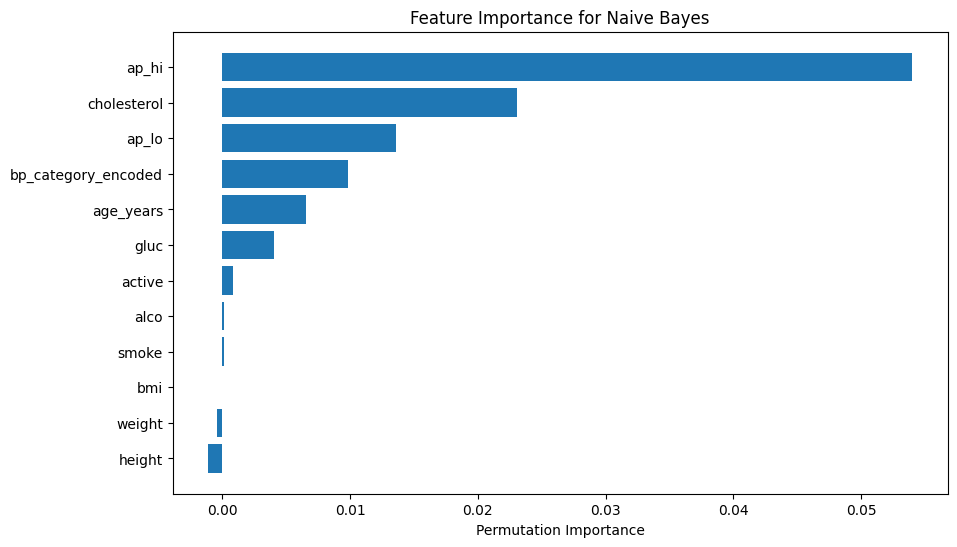

In [ ]:
get_feature_importance(gnb_model_women, X_val_women, y_val_women, X_women.columns)
plot_feature_importance(gnb_model_women, X_val_women, y_val_women, X_women.columns, "Naive Bayes")

Feature Importances for GaussianNB:
ap_hi: 0.0685
cholesterol: 0.0226
ap_lo: 0.0176
bp_category_encoded: 0.0106
age_years: 0.0084
active: 0.0048
gluc: 0.0027
smoke: 0.0010
weight: 0.0005
height: 0.0004
alco: 0.0002
bmi: -0.0015


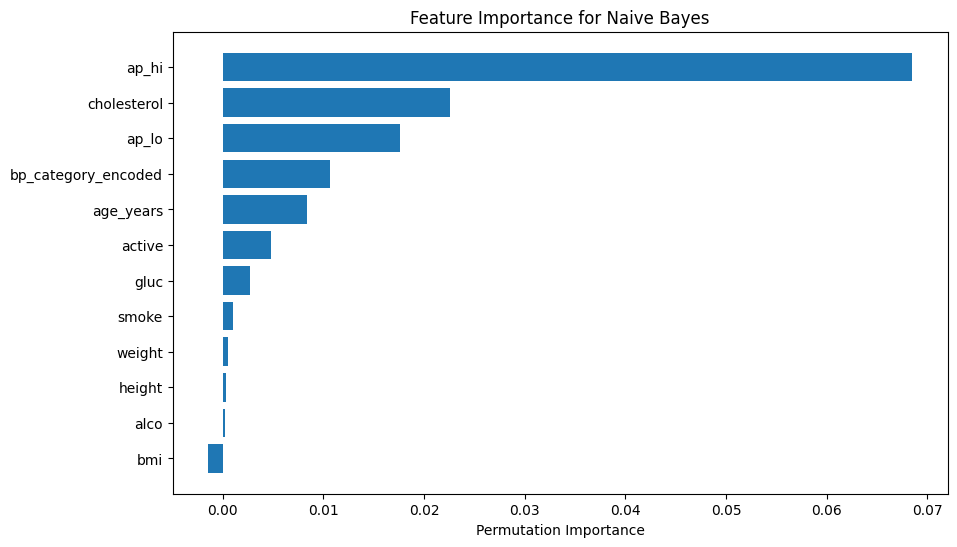

In [ ]:
get_feature_importance(gnb_model_men, X_val_men, y_val_men, X_men.columns)
plot_feature_importance(gnb_model_men, X_val_men, y_val_men, X_men.columns, "Naive Bayes")

## 7. Perceptron with Hyperparameter Tuning

In [ ]:
# Perceptron Parameter Grid
perceptron_param_grid = {
    'eta0': [0.1, 1, 10]  # Example values for learning rate (eta0)
}

perceptron_grid_search_all = GridSearchCV(Perceptron(max_iter=10000), perceptron_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
perceptron_grid_search_women = GridSearchCV(Perceptron(max_iter=10000), perceptron_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
perceptron_grid_search_men = GridSearchCV(Perceptron(max_iter=10000), perceptron_param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [ ]:
perceptron_grid_search_all.fit(X_train_all, y_train_all)
best_perceptron_params_all = perceptron_grid_search_all.best_params_
best_perceptron_model_all = perceptron_grid_search_all.best_estimator_

In [ ]:
perceptron_model_all = best_perceptron_model_all

with open('perceptron_model_all.pkl', 'wb') as file:
    pickle.dump(perceptron_model_all, file)

print("Model saved successfully!")

Model saved successfully!


In [ ]:
perceptron_grid_search_women.fit(X_train_women, y_train_women)
best_perceptron_params_women = perceptron_grid_search_women.best_params_
best_perceptron_model_women = perceptron_grid_search_women.best_estimator_

In [ ]:
perceptron_model_women = best_perceptron_model_women

with open('perceptron_model_women.pkl', 'wb') as file:
    pickle.dump(perceptron_model_women, file)

print("Model saved successfully!")

Model saved successfully!


In [ ]:
perceptron_grid_search_men.fit(X_train_men, y_train_men)
best_perceptron_params_men = perceptron_grid_search_men.best_params_
best_perceptron_model_men = perceptron_grid_search_men.best_estimator_

In [ ]:
perceptron_model_men = best_perceptron_model_men

with open('perceptron_model_men.pkl', 'wb') as file:
    pickle.dump(perceptron_model_men, file)

print("Model saved successfully!")

Model saved successfully!


In [ ]:
# Entire Data
y_pred_perceptron_tuned_all = best_perceptron_model_all.predict(X_val_all)

# Women's Data
y_pred_perceptron_tuned_women = best_perceptron_model_women.predict(X_val_women)

# Men's Data
y_pred_perceptron_tuned_men = best_perceptron_model_men.predict(X_val_men)

# Evaluating the models
print("Perceptron:")
evaluate_model(y_val_all, y_pred_perceptron_tuned_all, "Entire Data")
if not X_train_women.empty:
    evaluate_model(y_val_women, y_pred_perceptron_tuned_women, "Women's Data")
if not X_train_men.empty:
    evaluate_model(y_val_men, y_pred_perceptron_tuned_men, "Men's Data")

Perceptron:
------ Entire Data ------
Accuracy: 0.6976
Precision: 0.7020
Recall: 0.6474
F1-Score: 0.6736
ROC-AUC: 0.6958
Confusion Matrix:
[[3999 1374]
 [1763 3237]]


------ Women's Data ------
Accuracy: 0.6747
Precision: 0.6904
Recall: 0.5818
F1-Score: 0.6314
ROC-AUC: 0.6710
Confusion Matrix:
[[2666  841]
 [1348 1875]]


------ Men's Data ------
Accuracy: 0.6467
Precision: 0.6011
Recall: 0.8591
F1-Score: 0.7073
ROC-AUC: 0.6481
Confusion Matrix:
[[ 801 1032]
 [ 255 1555]]




In [ ]:
# Load the SVM models from their pickle files
with open('/content/perceptron_model_all.pkl', 'rb') as file:
    perceptron_model_all = pickle.load(file)

with open('/content/perceptron_model_women.pkl', 'rb') as file:
    perceptron_model_women = pickle.load(file)

with open('/content/perceptron_model_men.pkl', 'rb') as file:
    perceptron_model_men = pickle.load(file)

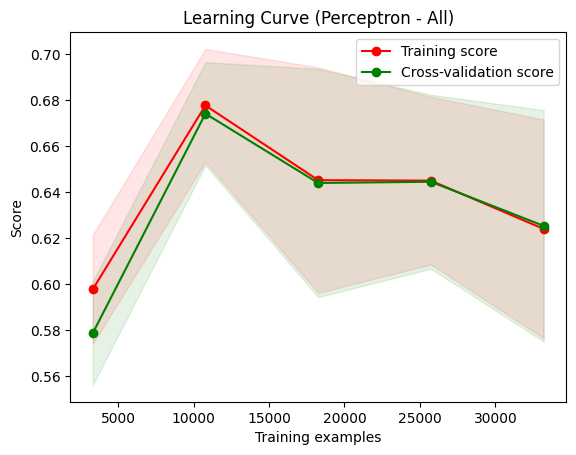

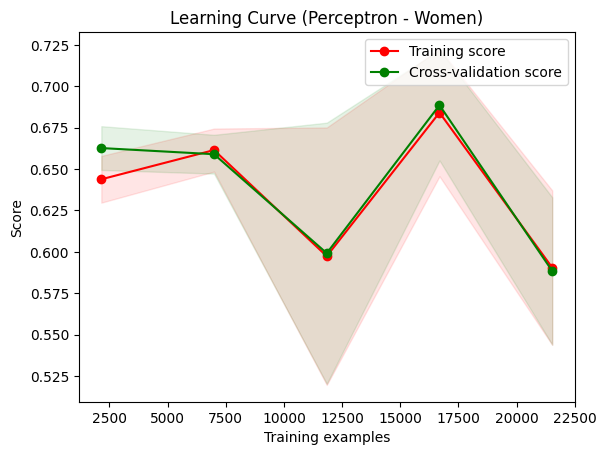

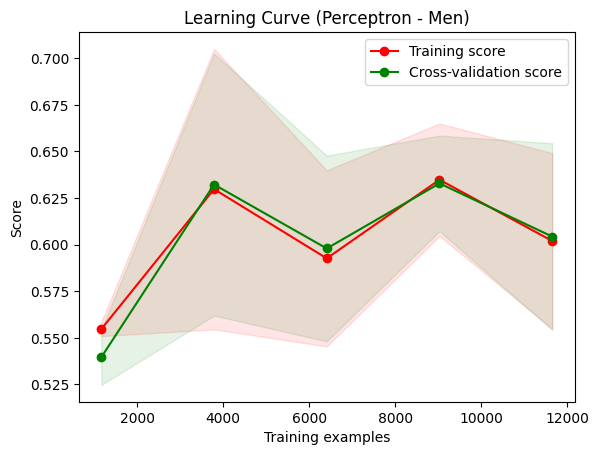

In [ ]:
# Plot learning curve for each model
plot_learning_curve(perceptron_model_all, "Learning Curve (Perceptron - All)", X_train_all, y_train_all, cv=5, n_jobs=4)
plot_learning_curve(perceptron_model_women, "Learning Curve (Perceptron - Women)", X_train_women, y_train_women, cv=5, n_jobs=4)
plot_learning_curve(perceptron_model_men, "Learning Curve (Perceptron - Men)", X_train_men, y_train_men, cv=5, n_jobs=4)

Feature Importances for Perceptron:
ap_hi: 0.0713
cholesterol: 0.0284
ap_lo: 0.0264
weight: 0.0238
gluc: 0.0084
gender: 0.0068
bmi: 0.0045
bp_category_encoded: 0.0034
active: 0.0020
age_years: 0.0014
alco: 0.0003
smoke: 0.0000
height: -0.0009


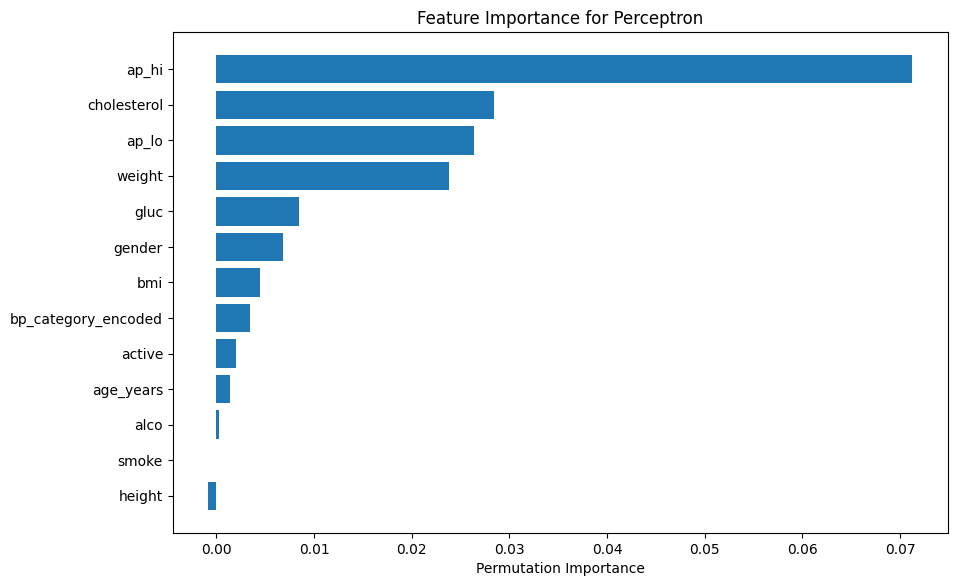

In [ ]:
get_feature_importance(perceptron_model_all, X_val_all, y_val_all, X_all.columns)
plot_feature_importance(perceptron_model_all, X_val_all, y_val_all, X_all.columns, "Perceptron")

Feature Importances for Perceptron:
ap_hi: 0.1333
cholesterol: 0.0588
bmi: 0.0170
gluc: 0.0117
height: 0.0039
age_years: 0.0036
active: 0.0015
smoke: 0.0006
alco: -0.0000
weight: -0.0024
ap_lo: -0.0147
bp_category_encoded: -0.0173


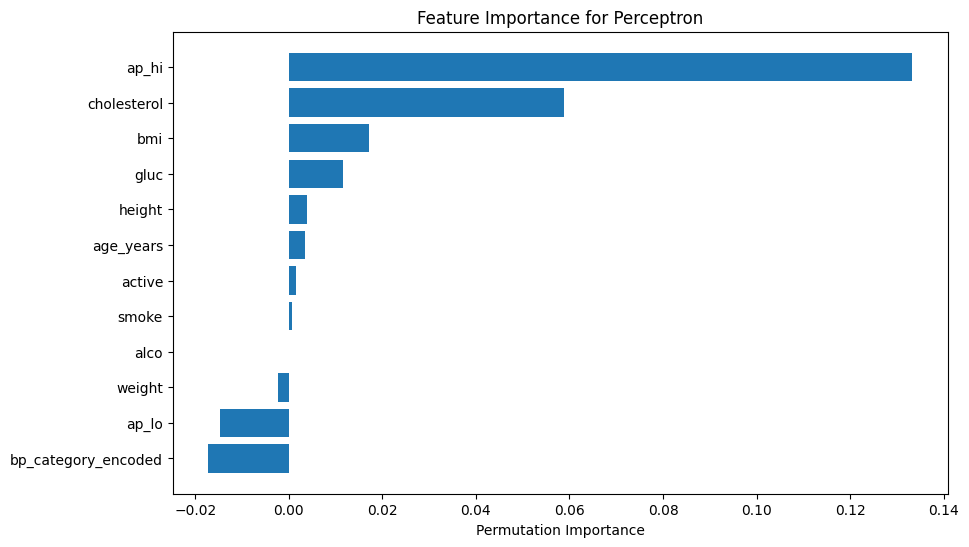

In [ ]:
get_feature_importance(perceptron_model_women, X_val_women, y_val_women, X_women.columns)
plot_feature_importance(perceptron_model_women, X_val_women, y_val_women, X_women.columns, "Perceptron")

Feature Importances for Perceptron:
ap_hi: 0.0791
age_years: 0.0747
weight: 0.0176
cholesterol: 0.0103
height: 0.0058
ap_lo: 0.0040
gluc: 0.0012
alco: 0.0004
smoke: -0.0011
active: -0.0017
bmi: -0.0031
bp_category_encoded: -0.0055


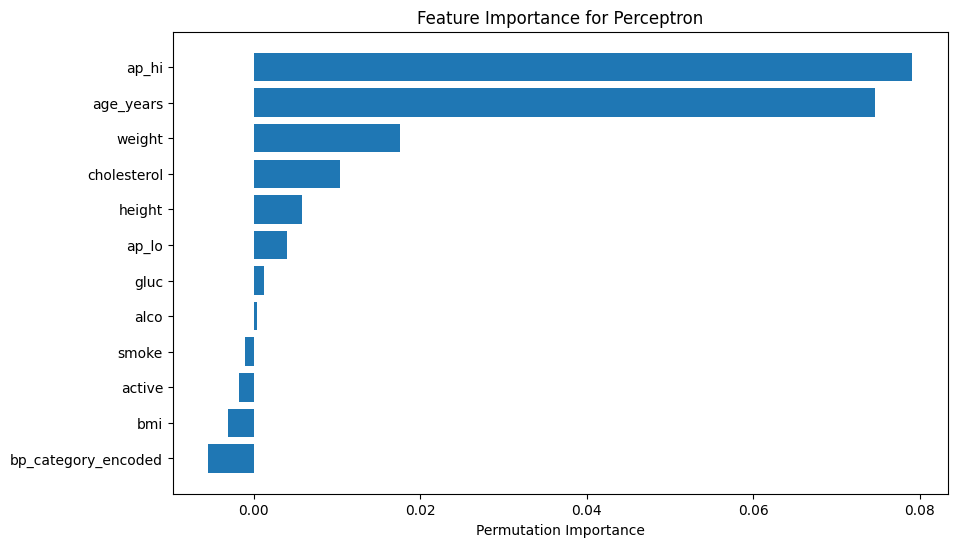

In [ ]:
get_feature_importance(perceptron_model_men, X_val_men, y_val_men, X_men.columns)
plot_feature_importance(perceptron_model_men, X_val_men, y_val_men, X_men.columns, "Perceptron")

## 8. Multi-Layer Perceptron (MLP)

In [ ]:
# MLP Parameter Grid
mlp_param_grid = {
    'hidden_layer_sizes': [(50, 50)],
    'learning_rate_init': [0.01]
}

mlp_grid_search_all = GridSearchCV(MLPClassifier(max_iter=1000, random_state=1), mlp_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
mlp_grid_search_women = GridSearchCV(MLPClassifier(max_iter=1000, random_state=1), mlp_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
mlp_grid_search_men = GridSearchCV(MLPClassifier(max_iter=1000, random_state=1), mlp_param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [ ]:
mlp_grid_search_all.fit(X_train_all, y_train_all)
best_mlp_params_all = mlp_grid_search_all.best_params_
best_mlp_model_all = mlp_grid_search_all.best_estimator_

In [ ]:
mlp_model_all = best_mlp_model_all

with open('mlp_model_all.pkl', 'wb') as file:
    pickle.dump(mlp_model_all, file)

print("Model saved successfully!")

Model saved successfully!


In [ ]:
mlp_grid_search_women.fit(X_train_women, y_train_women)
best_mlp_params_women = mlp_grid_search_women.best_params_
best_mlp_model_women = mlp_grid_search_women.best_estimator_

In [ ]:
mlp_model_women = best_mlp_model_women

with open('mlp_model_women.pkl', 'wb') as file:
    pickle.dump(mlp_model_women, file)

print("Model saved successfully!")

Model saved successfully!


In [ ]:
mlp_grid_search_men.fit(X_train_men, y_train_men)
best_mlp_params_men = mlp_grid_search_men.best_params_
best_mlp_model_men = mlp_grid_search_men.best_estimator_

In [ ]:
mlp_model_men = best_mlp_model_men

with open('mlp_model_men.pkl', 'wb') as file:
    pickle.dump(mlp_model_men, file)

print("Model saved successfully!")

Model saved successfully!


In [ ]:
# Entire Data
y_pred_mlp_tuned_all = best_mlp_model_all.predict(X_val_all)

# Women's Data
y_pred_mlp_tuned_women = best_mlp_model_women.predict(X_val_women)

# Men's Data
y_pred_mlp_tuned_men = best_mlp_model_men.predict(X_val_men)

# Evaluating the models
print("Multi-Layer Perceptron (MLP):")
evaluate_model(y_val_all, y_pred_mlp_tuned_all, "Entire Data")
if not X_train_women.empty:
    evaluate_model(y_val_women, y_pred_mlp_tuned_women, "Women's Data")
if not X_train_men.empty:
    evaluate_model(y_val_men, y_pred_mlp_tuned_men, "Men's Data")

Multi-Layer Perceptron (MLP):
------ Entire Data ------
Accuracy: 0.7177
Precision: 0.7245
Recall: 0.6686
F1-Score: 0.6954
ROC-AUC: 0.7160
Confusion Matrix:
[[4102 1271]
 [1657 3343]]


------ Women's Data ------
Accuracy: 0.7325
Precision: 0.7357
Recall: 0.6891
F1-Score: 0.7116
ROC-AUC: 0.7308
Confusion Matrix:
[[2709  798]
 [1002 2221]]


------ Men's Data ------
Accuracy: 0.7019
Precision: 0.7168
Recall: 0.6613
F1-Score: 0.6879
ROC-AUC: 0.7016
Confusion Matrix:
[[1360  473]
 [ 613 1197]]




In [ ]:
# Load the SVM models from their pickle files
with open('/content/mlp_model_all.pkl', 'rb') as file:
    mlp_model_all = pickle.load(file)

with open('/content/mlp_model_women.pkl', 'rb') as file:
    mlp_model_women = pickle.load(file)

with open('/content/mlp_model_men.pkl', 'rb') as file:
    mlp_model_men = pickle.load(file)

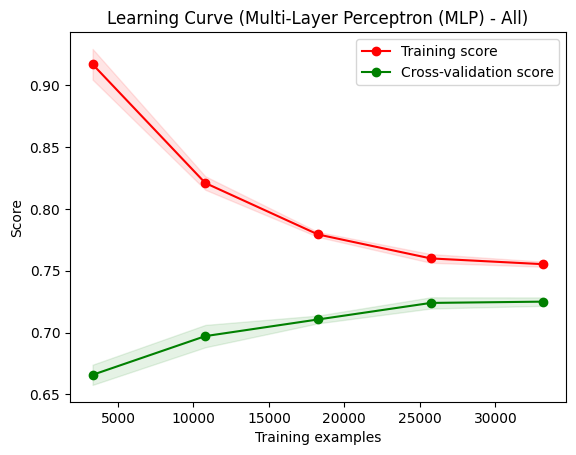

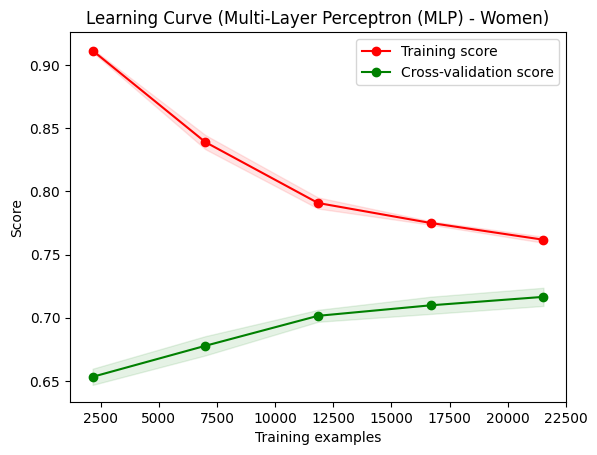

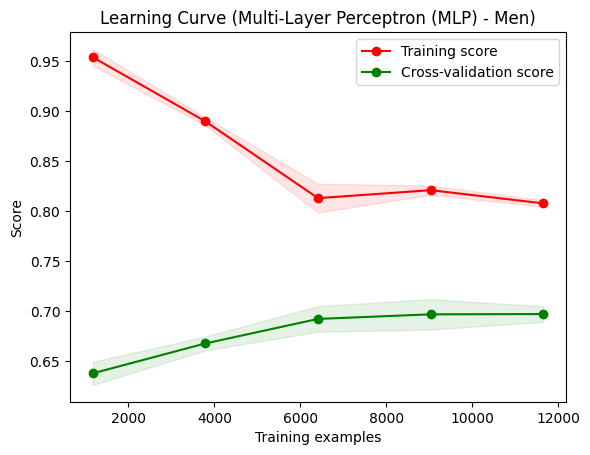

In [ ]:
# Plot learning curve for each model
plot_learning_curve(mlp_model_all, "Learning Curve (Multi-Layer Perceptron (MLP) - All)", X_train_all, y_train_all, cv=5, n_jobs=4)
plot_learning_curve(mlp_model_women, "Learning Curve (Multi-Layer Perceptron (MLP) - Women)", X_train_women, y_train_women, cv=5, n_jobs=4)
plot_learning_curve(mlp_model_men, "Learning Curve (Multi-Layer Perceptron (MLP) - Men)", X_train_men, y_train_men, cv=5, n_jobs=4)

Feature Importances for MLPClassifier:
ap_hi: 0.1386
cholesterol: 0.0309
age_years: 0.0221
ap_lo: 0.0121
active: 0.0042
bmi: 0.0022
gluc: 0.0022
weight: 0.0018
gender: 0.0016
bp_category_encoded: 0.0013
height: 0.0010
smoke: 0.0006
alco: -0.0001


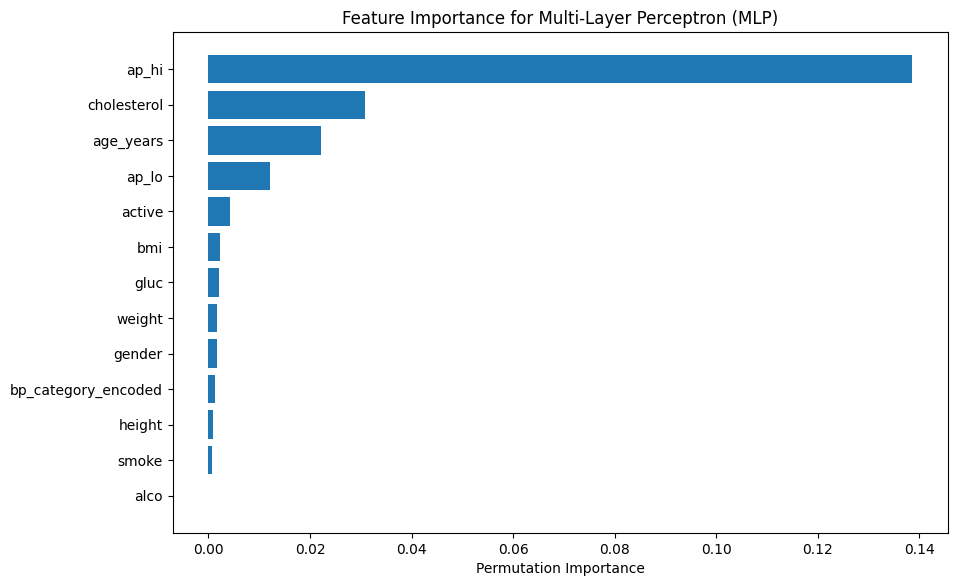

In [ ]:
get_feature_importance(mlp_model_all, X_val_all, y_val_all, X_all.columns)
plot_feature_importance(mlp_model_all, X_val_all, y_val_all, X_all.columns, "Multi-Layer Perceptron (MLP)")


Feature Importances for MLPClassifier:
ap_hi: 0.1411
cholesterol: 0.0305
age_years: 0.0297
ap_lo: 0.0095
active: 0.0052
bmi: 0.0030
gluc: 0.0011
weight: 0.0010
bp_category_encoded: 0.0005
height: 0.0001
smoke: 0.0000
alco: -0.0006


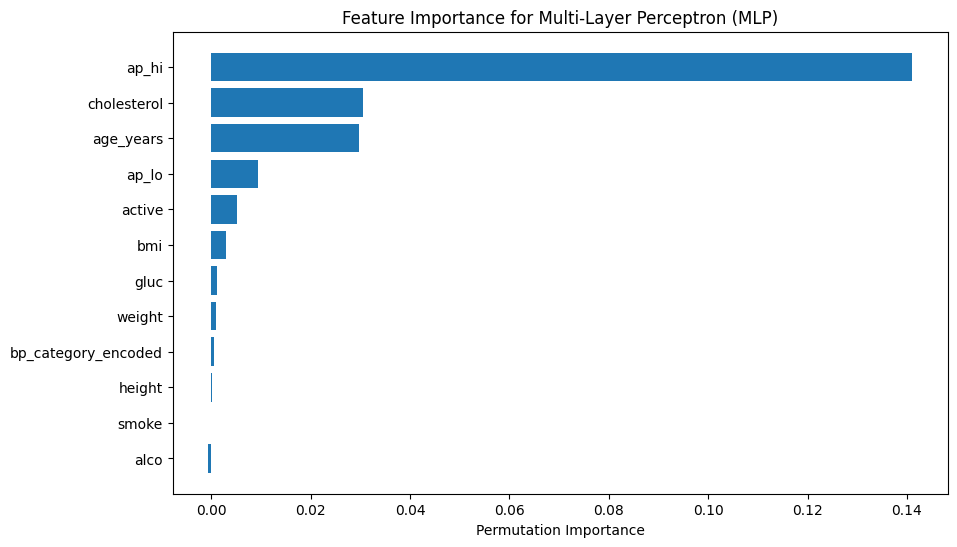

In [ ]:
get_feature_importance(mlp_model_women, X_val_women, y_val_women, X_women.columns)
plot_feature_importance(mlp_model_women, X_val_women, y_val_women, X_women.columns, "Multi-Layer Perceptron (MLP)")

Feature Importances for MLPClassifier:
ap_hi: 0.1364
ap_lo: 0.0244
cholesterol: 0.0205
age_years: 0.0184
active: 0.0081
bp_category_encoded: 0.0061
gluc: 0.0047
weight: 0.0021
alco: -0.0004
bmi: -0.0029
smoke: -0.0032
height: -0.0034


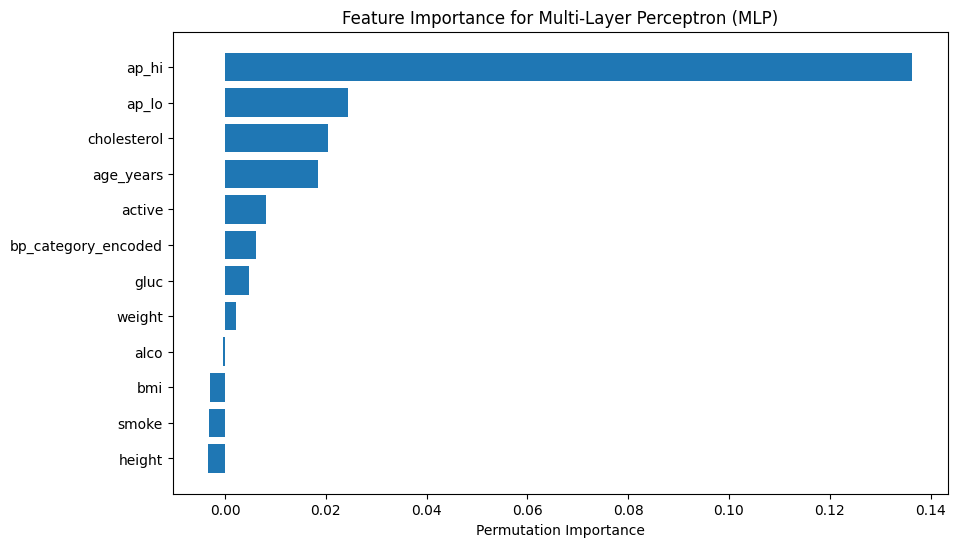

In [ ]:
get_feature_importance(mlp_model_men, X_val_men, y_val_men, X_men.columns)
plot_feature_importance(mlp_model_men, X_val_men, y_val_men, X_men.columns, "Multi-Layer Perceptron (MLP)")

# Ensemble Model

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import VotingClassifier

In [ ]:
# Load the trained models
with open('/content/rf_model_all.pkl', 'rb') as file:
    model_all_1 = pickle.load(file)
with open('/content/svm_model_all.pkl', 'rb') as file:
    model_all_2 = pickle.load(file)
with open('/content/xgb_model_all.pkl', 'rb') as file:
    model_all_3 = pickle.load(file)
with open('/content/lr_model_all.pkl', 'rb') as file:
    model_all_4 = pickle.load(file)

with open('/content/rf_model_women.pkl', 'rb') as file:
    model_women_1 = pickle.load(file)
with open('/content/svm_model_women.pkl', 'rb') as file:
    model_women_2 = pickle.load(file)
with open('/content/xgb_model_women.pkl', 'rb') as file:
    model_women_3 = pickle.load(file)
with open('/content/lr_model_women.pkl', 'rb') as file:
    model_women_4 = pickle.load(file)

with open('/content/rf_model_men.pkl', 'rb') as file:
    model_men_1 = pickle.load(file)
with open('/content/svm_model_men.pkl', 'rb') as file:
    model_men_2 = pickle.load(file)
with open('/content/xgb_model_men.pkl', 'rb') as file:
    model_men_3 = pickle.load(file)
with open('/content/lr_model_men.pkl', 'rb') as file:
    model_men_4 = pickle.load(file)

In [ ]:
# Ensemble model for the entire dataset with weighted average
ensemble_all = VotingClassifier(
    estimators=[
        ('rf', model_all_1),
        ('svm', model_all_2),
        ('xgb', model_all_3),
        ('lr', model_all_4)
    ],
    voting='hard',
    weights=[2, 1, 3, 1]
)

# Ensemble model for women's dataset with weighted average
ensemble_women = VotingClassifier(
    estimators=[
        ('rf', model_women_1),
        ('svm', model_women_2),
        ('xgb', model_women_3),
        ('lr', model_women_4)
    ],
    voting='hard',
    weights=[2, 1, 3, 1]
)

# Ensemble model for men's dataset with weighted average
ensemble_men = VotingClassifier(
    estimators=[
        ('rf', model_men_1),
        ('svm', model_men_2),
        ('xgb', model_men_3),
        ('lr', model_men_4)
    ],
    voting='hard',
    weights=[2, 1, 3, 1]
)


In [ ]:
# Fit and evaluate ensemble model for the entire dataset
ensemble_all.fit(X_train_all, y_train_all)
predictions_all = ensemble_all.predict(X_test_all)
evaluate_model(y_test_all, predictions_all, "Ensemble - Entire Data")

# Fit and evaluate ensemble model for women's dataset
ensemble_women.fit(X_train_women, y_train_women)
predictions_women = ensemble_women.predict(X_test_women)
evaluate_model(y_test_women, predictions_women, "Ensemble - Women's Data")

# Fit and evaluate ensemble model for men's dataset
ensemble_men.fit(X_train_men, y_train_men)
predictions_men = ensemble_men.predict(X_test_men)
evaluate_model(y_test_men, predictions_men, "Ensemble - Men's Data")

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


------ Ensemble - Entire Data ------
Accuracy: 0.7320
Precision: 0.7556
Recall: 0.6602
F1-Score: 0.7047
ROC-AUC: 0.7298
Confusion Matrix:
[[5345 1341]
 [2134 4146]]




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


------ Ensemble - Women's Data ------
Accuracy: 0.7342
Precision: 0.7467
Recall: 0.6697
F1-Score: 0.7061
ROC-AUC: 0.7314
Confusion Matrix:
[[3491  911]
 [1325 2686]]




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


------ Ensemble - Men's Data ------
Accuracy: 0.7332
Precision: 0.7510
Recall: 0.6701
F1-Score: 0.7083
ROC-AUC: 0.7312
Confusion Matrix:
[[1864  489]
 [ 726 1475]]




In [ ]:
with open('ensemble_model_all.pkl', 'wb') as file:
    pickle.dump(ensemble_all, file)

print("Ensemble models saved successfully!")

with open('ensemble_model_women.pkl', 'wb') as file:
    pickle.dump(ensemble_women, file)

print("Ensemble models saved successfully!")

with open('ensemble_model_men.pkl', 'wb') as file:
    pickle.dump(ensemble_men, file)

print("Ensemble models saved successfully!")

Ensemble models saved successfully!
Ensemble models saved successfully!
Ensemble models saved successfully!


In [ ]:
# Load the Ensemble models from their pickle files
with open('/content/ensemble_model_all.pkl', 'rb') as file:
    ensemble_model_all = pickle.load(file)

with open('/content/ensemble_model_women.pkl', 'rb') as file:
    ensemble_model_women = pickle.load(file)

with open('/content/ensemble_model_men.pkl', 'rb') as file:
    ensemble_model_men = pickle.load(file)

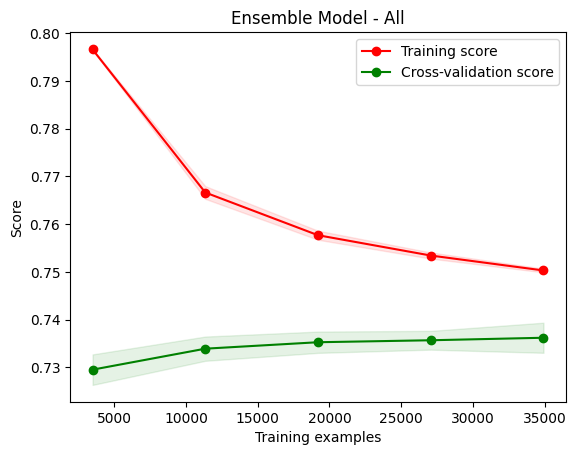

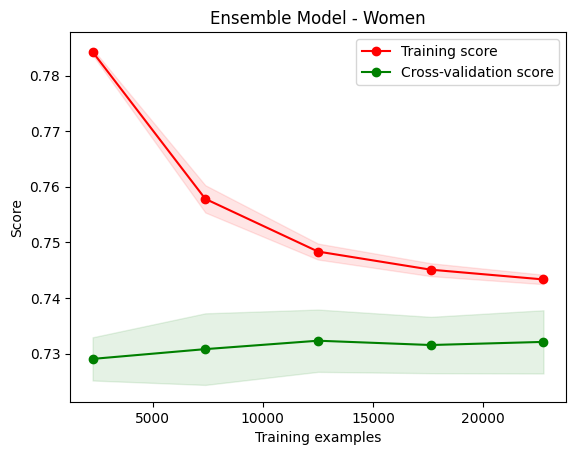

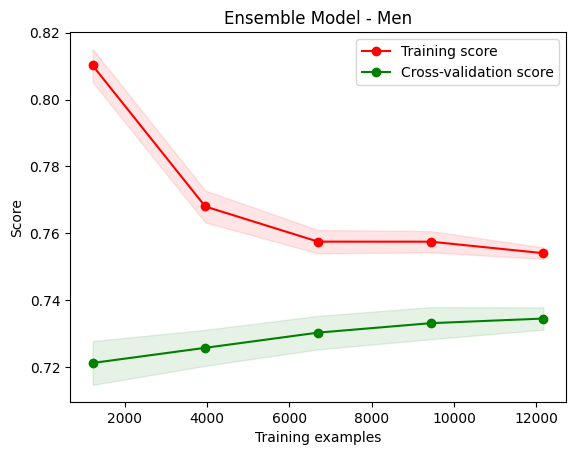

In [ ]:
# Plot learning curve for each model using training set
plot_learning_curve(ensemble_model_all, "Ensemble Model - All", X_train_all, y_train_all, cv=5, n_jobs=4)
plot_learning_curve(ensemble_model_women, "Ensemble Model - Women", X_train_women, y_train_women, cv=5, n_jobs=4)
plot_learning_curve(ensemble_model_men, "Ensemble Model - Men", X_train_men, y_train_men, cv=5, n_jobs=4)

Feature Importances for VotingClassifier:
ap_hi: 0.1407
cholesterol: 0.0351
age_years: 0.0182
bmi: 0.0031
gluc: 0.0026
active: 0.0024
ap_lo: 0.0019
weight: 0.0012
gender: 0.0008
height: 0.0005
bp_category_encoded: 0.0002
smoke: 0.0002
alco: 0.0002


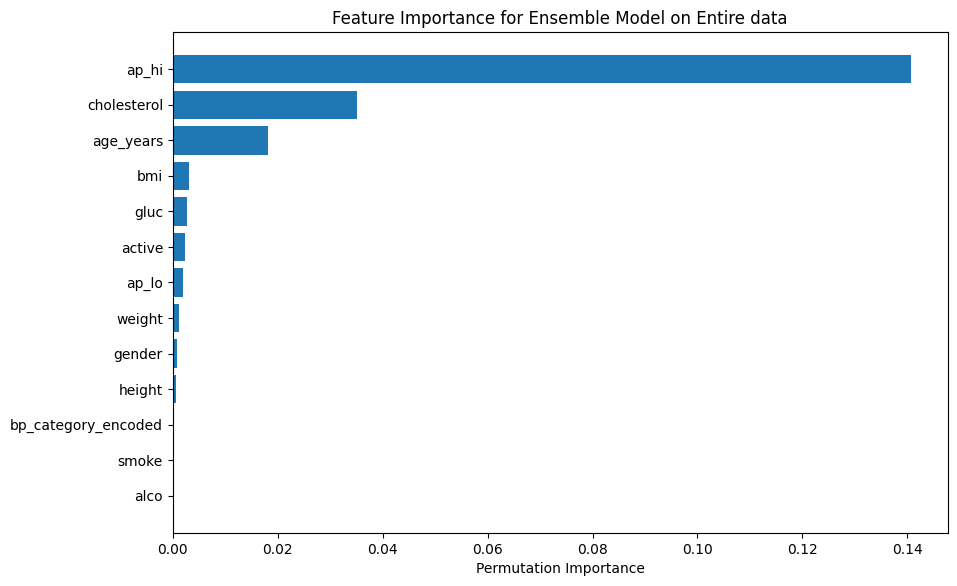

In [ ]:
get_feature_importance(ensemble_model_all, X_test_all, y_test_all, X_all.columns)
plot_feature_importance(ensemble_model_all, X_test_all, y_test_all, X_all.columns, "Ensemble Model on Entire data")

Feature Importances for VotingClassifier:
ap_hi: 0.1484
cholesterol: 0.0363
age_years: 0.0317
ap_lo: 0.0046
bmi: 0.0029
weight: 0.0021
bp_category_encoded: 0.0016
height: 0.0014
active: 0.0012
gluc: 0.0012
alco: 0.0006
smoke: 0.0000


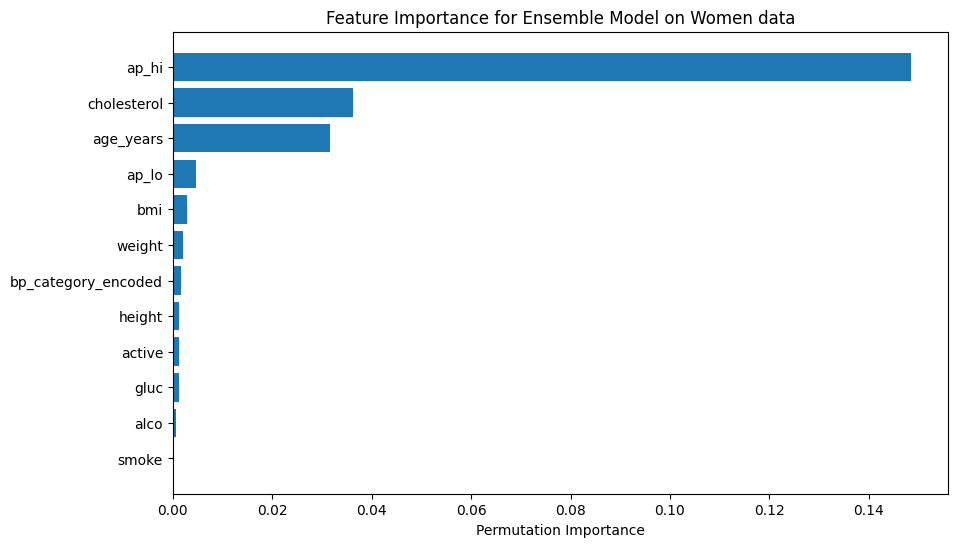

In [ ]:
get_feature_importance(ensemble_model_women, X_test_women, y_test_women, X_women.columns)
plot_feature_importance(ensemble_model_women, X_test_women, y_test_women, X_women.columns, "Ensemble Model on Women data")

Feature Importances for VotingClassifier:
ap_hi: 0.1625
cholesterol: 0.0291
age_years: 0.0203
ap_lo: 0.0072
active: 0.0052
bmi: 0.0051
height: 0.0050
weight: 0.0025
gluc: 0.0017
smoke: 0.0014
bp_category_encoded: 0.0010
alco: 0.0002


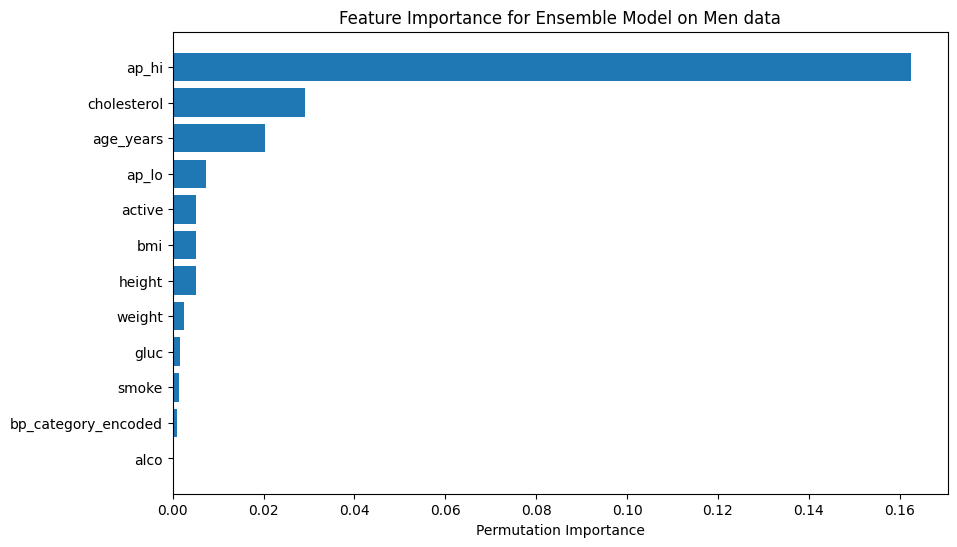

In [ ]:
get_feature_importance(ensemble_model_men, X_test_men, y_test_men, X_men.columns)
plot_feature_importance(ensemble_model_men, X_test_men, y_test_men, X_men.columns, "Ensemble Model on Men data")



---

